In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 6-2 인공 신경망

다층 퍼셉트론에서 보다 발전하여 다양한 종류의 구성요소를 가집니다.

## 0-1. 프로그래밍 환경

딥러닝은 실기 시험 영역에는 포함되어 있지 않습니다.

인공신경망부터 예시들은 Tensorflow 2.X 라이브러리가 추가됩니다.

DS Level 3 에서는 딥러닝은 이론만 시험 범위에 해당 됩니다.

시험에는 Tensorflow를 사용할 상황은 **절대** 없습니다.

Tensorflow로 구성된 실습 예제를 이해할 정도의 내용만 Tensorflow 소개 형식의 가이드만을 남깁니다.

모든 실습 내용은 [Google Colab](https://colab.research.google.com/)에서 작성되었습니다.

자체 tensorflow 라이브러리를 지니고 계신다면, 사용하실 수 있지만, 버젼 차이로 인한 소스의 수정이 필요할 수 있습니다.

Colab에서 실습 내용을 여러 번 실행시키다보면, Colab에서 제공하는 리소스를 초과해서 사용할 수 있습니다.

이 경우 Colab 세션이 강제적으로 재시작 되어 초기화 될 수 있습니다.

이 점을 염두하시길 바랍니다.


## 0-2 데이터셋 소개

## MovieLens 100K

[MovieLens](https://grouplens.org/datasets/movielens/) 사이트에서 수집된 영화 평점 데이터셋 입니다.

 영화의 메타데이터(movies_100k.csv), 사용자 메타데이터(users_100k.csv)그리고 사용자별 영화 평점(ratings_100k.csv)으로 3개의 데이터로 구성된 데이터셋입니다.

영화 정보: movies_100k.csv

|Name|Type|Description|
|---|---|-----|
|movie id|integer|영화 id|
|movie title|string|영화 제목|
|release date|string|출시 시점|
|unknown, Action, Adventure, ...|boolean|장르 여부|


사용자 정보: users_100k.csv

|Name|Type|Description|
|---|---|----|
|user id|integer|사용자 id|
|age|integer|나이|
|gender|boolean|설별|
|occupation|nominal|직업|
|zip code|nominal|거주지 우편번호|

평점 이력: ratings_100k.csv

|Name|Type|Description|
|---|----|----|
|user id|integer|사용자 id|
|item id|integer|영화 id|
|rating|integer|평점|
|timestamp|integer|평점 시점, timestamp|

카디날리티가 큰 범주형 데이터를 지닌 데이터 셋입니다.

In [2]:
# Google Colab 환경과 같은 간이 Notebook 환경을 고려하여 데이터셋을 다운로르 받아 사용합니다.
if not os.path.isfile('data/ratings_100k.csv'):
    if not os.path.isdir('data'):
        !mkdir data
    !pip install gdown
    !gdown 1WfdswkjxOt3QmxxmjryouV0fkD-sGtX3
    !mv ratings_100k.csv data/
    !gdown 17ilbowdshqggVbK4VJwhbdaMLFXPmAtG
    !mv users_100k.csv data/
    !gdown 1SX84B13wp4OFP8W1lPjJNK3NZewEKGg_
    !mv movies_100k.csv data/
    !gdown 1vCq0dxrE8GFxfhFrfy1vLXym3pNyUtGR
    !mv dino_cleaned.csv data/

Downloading...
From: https://drive.google.com/uc?id=1WfdswkjxOt3QmxxmjryouV0fkD-sGtX3
To: /content/ratings_100k.csv
100% 1.98M/1.98M [00:00<00:00, 63.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=17ilbowdshqggVbK4VJwhbdaMLFXPmAtG
To: /content/users_100k.csv
100% 22.7k/22.7k [00:00<00:00, 33.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SX84B13wp4OFP8W1lPjJNK3NZewEKGg_
To: /content/movies_100k.csv
100% 134k/134k [00:00<00:00, 69.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vCq0dxrE8GFxfhFrfy1vLXym3pNyUtGR
To: /content/movies_100k.csv
100% 134k/134k [00:00<00:00, 41.2MB/s]
mv: cannot stat 'dino_cleaned.csv': No such file or directory


In [3]:
df_movie = pd.read_csv('data/movies_100k.csv', index_col='movie id')
df_movie.head()

,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df_user = pd.read_csv('data/users_100k.csv', index_col='user id')
df_user.head()

,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [5]:
df_ratings = pd.read_csv('data/ratings_100k.csv')
df_ratings.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


## Dinosaur name

Kaggle에 [Dinoaur List](https://www.kaggle.com/datasets/kumazaki98/dinosaur-list)를 가져와서 정리 작업을 거친 데이터셋 입니다.

|Name|Type|Description|
|----|----|---------|
|Name|string|공룡이름|
|Period|string|서식시기|
|Diet|string|식성|
|Country|string|서식지역|
|Name_kr|string|우리말 이름|

In [8]:
if not os.path.isfile('data/dino_cleaned.csv'):
    !gdown 1uJv-7FG14OkUSq4VBVbZyK0MoPu9ti4e
    !mv dino_cleaned.csv data/
df_dino = pd.read_csv('data/dino_cleaned.csv')
df_dino.head()

Downloading...
From: https://drive.google.com/uc?id=1uJv-7FG14OkUSq4VBVbZyK0MoPu9ti4e
To: /content/dino_cleaned.csv
100% 84.7k/84.7k [00:00<00:00, 51.3MB/s]


,Name,Period,Diet,Country,Name_kr,Continent
0,Aardonyx,Jurassic,herbivore,South Africa,아르도닉스,Africa
1,Abelisaurus,Cretaceous,carnivore,South America,아벨리사우르스,South America
2,Abrictosaurus,Jurassic,herbivore,South Africa,아브릭토사우르스,Africa
3,Abrosaurus,Jurassic,herbivore,China,아브로사우르스,Asia
4,Abydosaurus,Cretaceous,herbivore,North America,아비도사우르스,North America


## 1. Tensorflow 초간단 가이드

### Tensorflow

#### Tensor란?

n차원 배열 n이 0이면 단일수, n이 1이면 Vector, n이 2이면 Matrix, n이 3이면 Cube, ... 를 통틀어 나타내는 단어 입니다.

머신러닝 관점에서 Tensorflow를 한 마디로, 모수적 모델을 구현하기 위한 라이브러리입니다.


#### Tensorflow의 주요 역할

1. 인공 신경망 모델 구성


2. 학습 및 예측


3. 데이터 셋 구성 및 처리


In [9]:
import os
# 불필요한 경고 메세지가 너무 많이 나와서 내용 파악에 어려움이 있어
# Tensorflow에서 출력하는 경고 메세지를 보이지 않게 조정합니다.
# 개발 단계에서는 비활성화 시키지 않는 것을 권장드립니다.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

# GPU가 있다면, GPU 메모리를 최대한 활용할 수 있도록 설정합니다.
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print("{} Physical GPUs, {} Logical GPUs".format(len(gpus), len(logical_gpus)))
    except RuntimeError as e:
        print(e)

#### Keras

딥러닝 모델을 쉽게 구축하기 위한 딥러닝 프레임워크(Deep learning Framework) 입니다.

Keras는 Tensorflow를 기본 backend로 사용하고 있습니다.


예제에서 사용하는 대부분의 모델링 요소는 Keras를 기반으로 합니다.

Tensorflow에 익숙해지기 위해서 보기의 예를 통해서 설명을 하고, 주석을 통해 기능을 설명합니다.

#### 예제 데이터 생성

퍼셉트론에서 예시를 들었던 1사분면과 3사분면에는 양의 클래스와 2사분면과 4사분면에는 음의 클래스가 분포하는

100개의 레코드로 이루어진 데이터셋을 만듭니다.


이를 분류하는 모델을 만듭니다.


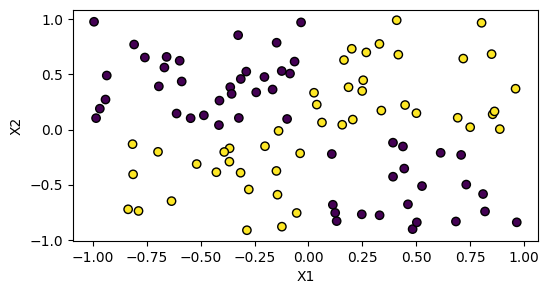

In [11]:
np.random.seed(123)
X_nonlin = np.random.rand(100, 2) * 2 - 1
y_nonlin = (X_nonlin[:, 0] * X_nonlin[:, 1] > 0).astype(int) # 바둑판 모양의 경계면을 지닌 선형 분류가 불가능한 데이터셋을 만듭니다.

plt.figure(figsize=(6, 3))
plt.scatter(X_nonlin[:, 0], X_nonlin[:, 1], c=y_nonlin, marker='o', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In [12]:
# tf.data.Dataset.from_tensor_slices: Numpy, Pandas data 객체를 Tensorflow Dataset으로 만들어 줍니다.
# 1. Tensorflow에 numpy나 DataFrame 직접 전달시 발생하는 Gabage 문제를 회피 가능합니다.
# 2. 데이터를 배치(batch)로 나누고, 섞는shuffle 등의 처리 작업이 용이합니다.
ds_nonlin = tf.data.Dataset.from_tensor_slices(
    (X_nonlin, y_nonlin)
)

#### 모델 생성

**tf.keras.Model**

딥러닝 모델을 구성하고 학습과 예측 기능을 제공해주는 클래스입니다.

모델 구성의 팁: 복잡한 모델을 만들 때, 모델에서 다루는 Tensor의 형태(Shape)를 파악하기 쉽도록 주석으로 달아 줍니다.

이 때, 배열의 첫 번째 차원은 주로 배치(batch) 사이즈를 두고 생각합니다.


**[Ex.1]**

아래 그림과 같은 다층 퍼셉트론 모델을 tf.keras.Model로 만듭니다.

모델의 입력은 배치(batch) 사이즈 만큼의 2차원의 값을 받습니다.

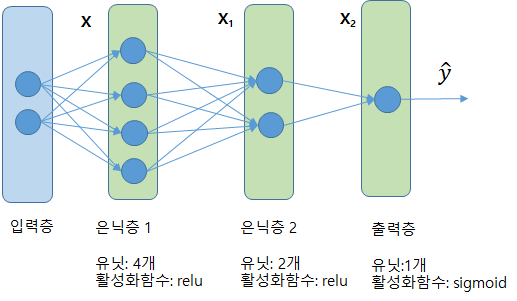

In [13]:
# Tensorflow로 선형회귀 모델(Linear Regression Model)을 정의합니다.
# __init__에서는 모델에서 사용하는 요소들의 인스턴스를 만듭니다.
# call에서는 요소간의 데이터 흐름(호출)관계를 구현합니다.
class BadukModel(tf.keras.Model):
    def __init__(self):
        super().__init__()

        # tf.keras.layers.Dense: 밀도층 만듭니다.
        # 비대칭형 활성화함수로 설정된 층에서 가중치를 초기화할 때 권장하는 초기화 방법 He (Normal 또는 Uniform)을 사용합니다.
        self.hidden_layer1 = tf.keras.layers.Dense(4, # 유닛의 수: 4
            activation='relu', # 활성화 함수: ReLU
            kernel_initializer=tf.keras.initializers.HeNormal() # 가중치 초기화 방법, He Normal(정규분포) 가중치 ~ N(0,  \sqrt(2}/n)
        )
        self.hidden_layer2 = tf.keras.layers.Dense(
            2, activation='relu',
            kernel_initializer=tf.keras.initializers.HeNormal()
        )
        self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, X, training=False):
        # X:  입력 텐서로 n × 2 차원을 가집니다. n: 배치(batch)의 크기
        X = self.hidden_layer1(X) # 첫번째 은닉층을 통과하면 크기가 n × 4 텐서가 출력됩니다.
        X = self.hidden_layer2(X) # 첫번째 은닉층을 통과하면 크기가  n × 2  텐서가 출력됩니다.
        y_hat = self.output_layer(X) # 출력층을 통과하면 크기가 n × 1 텐서가 출력됩니다.
        return y_hat

#### 학습

Tensorflow은 두 가지 방법의 학습 루틴을 제공합니다.


직접 train loop를 만들어 봅니다. Tensorflow 학습 과정을 직적 살펴 볼수 있고, 나중에 학습 과정에서 특별한 처리가 필요할 때 사용할 수 있습니다.

In [38]:
# Tensorflow의 세션을 초기화 시킵니다.
tf.keras.backend.clear_session()
# 바둑 모델을 생성합니다.
baduk_model = BadukModel()

# 모델의 작동을 확인하기 위해 처음 2개의 입력변수 모델에 전달합니다.
print("입력의 차원: {}".format(X_nonlin[:2].shape))
y_hat = baduk_model(X_nonlin[:2])
print("출력의 차원: {}, 텐서의 내용: {}".format(y_hat.shape, y_hat))

입력의 차원: (2, 2)
출력의 차원: (2, 1), 텐서의 내용: [[0.5       ]
 [0.36467916]]


In [39]:
# 손실함수를 생성합니다.
# from_logits 는 BinaryCrossentropy에 전달이 되는 것이 로짓(Logit)이면 True 아니면 False 입니다.
# 출력층에 활성화 함수를 sigmoid로 했기 때문에 확률이 출력되므로 False입니다.
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
# 옵티마이저(손실함수를 낮추는 가중치(Weight)를 찾아주는 모듈)을 생성합니다.: Adam 최적화기법을 사용합니다
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # 학습율을 0.001으로 설정합니다.
@tf.function
def train_baduk_step(X, y):
    # Tensorflow는 자동 미분(Automatic differentiation) 기능 활용하면, 오류 역전파를 구현하지 않아도 경사도를 구할 수 있습니다.
    # 모델에서 예측값을 구하고, 예측값과 실제값의 손실을 구하는 과정을 tape 객체에 담습니다.
    with tf.GradientTape() as tape:
        y_hat = baduk_model(X)
        loss = bce(y, y_hat)
    # 모델에서 학습 가능한 가중치를 가져옵니다.
    variables = baduk_model.trainable_variables
    # 가중치에 대한 경사도를 구합니다.
    gradients = tape.gradient(loss, variables)
    # 구한 기울기를 가지고 가중치를 업데이트합니다
    optimizer.apply_gradients(zip(gradients, variables))
    # 손실을 반환합니다.
    return loss

In [40]:
losses = []
for epoch in range(300):
    losses_epoch = []
    # tf.dataset.Dataset의 batch 메소드는 배치 사이즈 만큼으로 데이터를 나누어 줍니다,
    for X_, y_ in ds_nonlin.shuffle(100).batch(8):
        losses_epoch.append(train_baduk_step(X_, y_).numpy())
    # epoch 별 손실을 기록합니다.
    losses.append(np.mean(losses_epoch))

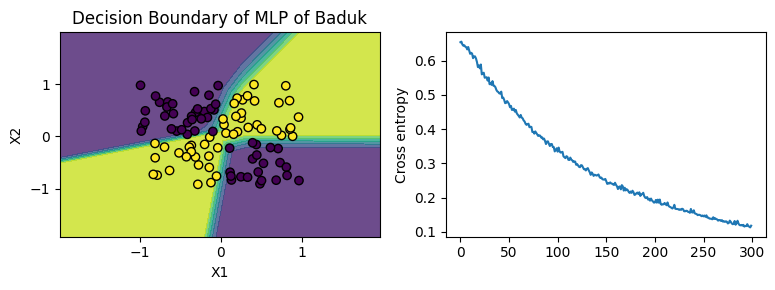

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# 결정 공간을 정의합니다.
x_min, x_max = X_nonlin[:, 0].min() - 1, X_nonlin[:, 0].max() + 1
y_min, y_max = X_nonlin[:, 1].min() - 1, X_nonlin[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# 결정 공간에서 학습한 모델의 예측 결과를 만듭니다.
Z = baduk_model.predict(tf.data.Dataset.from_tensor_slices(np.c_[xx.ravel(), yy.ravel()]).batch(128), verbose=0)
Z = Z.reshape(xx.shape)

axes[0].contourf(xx, yy, Z, alpha=0.8)
axes[0].scatter(X_nonlin[:, 0], X_nonlin[:, 1], c=y_nonlin, marker='o', edgecolors='k')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Decision Boundary of MLP of Baduk')

axes[1].plot(losses)
axes[1].set_ylabel('Cross entropy')

plt.tight_layout()
plt.show()

#### 모델 생성과 학습 간소화

tf.keras.Model을 상속을 받아 만들었지만,

tf.keras.models.Sequential을 사용하면 직렬 구조의 신경망 모델을 보다 쉽게 만들 수 있습니다.

In [42]:
# Tensorflow의 세션을 초기화 시킵니다.
tf.keras.backend.clear_session()

baduk_seq_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()), # 첫번째 은닉층
    tf.keras.layers.Dense(2, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()), # 두번째 은닉층
    tf.keras.layers.Dense(1, activation='sigmoid') #  출력층
])

- 학습 함수와 루프로 모델을 학습시켰지만, tf.keras.Model의 compile ~ fit으로 학습 과정을 간단히 해봅니다.

In [43]:
# compile: 학습에 필요한 설정을 전달하면, 학습에 필요한 리소스를 생성합니다.
baduk_seq_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)
train_hist = baduk_seq_model.fit(ds_nonlin.shuffle(100).batch(8),epochs=300, verbose=0)

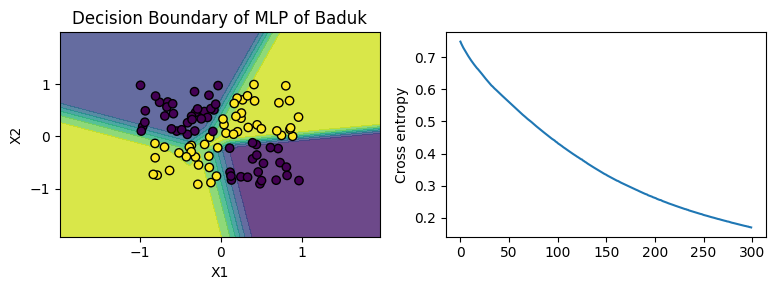

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# 결정 공간을 정의합니다.
x_min, x_max = X_nonlin[:, 0].min() - 1, X_nonlin[:, 0].max() + 1
y_min, y_max = X_nonlin[:, 1].min() - 1, X_nonlin[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# 결정 공간에서 학습한 모델의 예측 결과를 만듭니다.
Z = baduk_seq_model.predict(tf.data.Dataset.from_tensor_slices(np.c_[xx.ravel(), yy.ravel()]).batch(64), verbose=0)
Z = Z.reshape(xx.shape)

axes[0].contourf(xx, yy, Z, alpha=0.8)
axes[0].scatter(X_nonlin[:, 0], X_nonlin[:, 1], c=y_nonlin, marker='o', edgecolors='k')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Decision Boundary of MLP of Baduk')

axes[1].plot(train_hist.history['loss'])
axes[1].set_ylabel('Cross entropy')

plt.tight_layout()
plt.show()

In [45]:
# 신경망 각층의 출력 형태와 모수의 크기를 보여줍니다.
baduk_seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# 각 층의 모수의 내용을 출력해 봅니다.
for i, title in zip(baduk_seq_model.layers, ['첫번째 은닉층', '두번째 은닉층', '출력층']):
    print(title)
    print('가중치 행렬 크기:{}'.format(i.get_weights()[0].shape))
    print('가중치 행렬 내용: {}'.format(i.get_weights()[0]))
    print('절편의 크기: {}'.format(i.get_weights()[1].shape))
    print('절편의 내용: {}'.format(i.get_weights()[1]))

첫번째 은닉층
가중치 행렬 크기:(2, 4)
가중치 행렬 내용: [[ 0.56598264 -0.40940592  4.866037    1.3290197 ]
 [-2.851364   -0.34077516 -3.2470446   1.1231921 ]]
절편의 크기: (4,)
절편의 내용: [ 0.36851054 -0.47736043 -0.12749302 -0.41518527]
두번째 은닉층
가중치 행렬 크기:(4, 2)
가중치 행렬 내용: [[ 2.5399368   2.770537  ]
 [ 0.4596836  -0.06157087]
 [-2.4939928  -2.6981564 ]
 [-0.16578771 -0.06090021]]
절편의 크기: (2,)
절편의 내용: [-0.09324872 -0.10355096]
출력층
가중치 행렬 크기:(2, 1)
가중치 행렬 내용: [[4.8967204]
 [6.13305  ]]
절편의 크기: (1,)
절편의 내용: [-0.7611038]


## 2. 가중치가 있는 층(Weighted Layer)


가중치를 가지고 있어, 데이터의 패턴을 나타내는 역할을 하는 층입니다.


### 밀도층(Dense layer)


- 전체 연결층(Fully-connected Layer)의 구조를 가지고 있습니다.
  

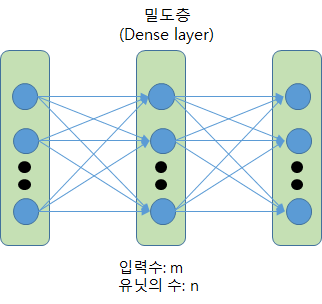

> 층의 모든 입력이 유닛(Unit)의 가중합 연산으로 사용되는 신경망입니다.
>
> 층의 입력수를 m, 출력수(유닛수) n 이면, 밀도층의 가중치 $W$는 m × n의 행렬로 정의되고, 절편(bias) $b$는 크기 n인 벡터로 정의 됩니다.
>
>→ 하나의 밀도층의 파라메터 수: m × n + n (절편이 있을 경우 포함)
>
> 층의 연산은 $f(X) = XW + b$ 으로 정의 됩니다.


**[데이터 전처리]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

MovieLens 100K 데이터셋을 다음과 같이 처리하여 이후 예제에서 사용합니다.

df_user에서는 age, gender, occupation의 열만,

df_movie에서는 소속 장르 여부(unknown, Action, ... , Western)의 열만 사용합니다.

df_ratings와 user_100k는 user id를 기준으로 두 데이터프레임을 결합합니다.

movie_100k는 item id를 기준으로 결합하여 df_ratings_all 데이터셋을 만듭니다.
    
</div>

In [49]:
# 소속 장르 컬럼을 뽑아냅니다.
genre_cols = [i for i in df_movie if i not in ['movie title', 'release date']]

In [50]:
# df_ratings에 df_user와 df_movie를 결합하여 df_ratings_all 데이터프레임을 만듭니다.
df_ratings_all = df_ratings[['user id', 'item id', 'rating']].join(
    df_user[['age', 'gender', 'occupation']], on = 'user id'
).join(
    df_movie[genre_cols], on = 'item id'
)

df_ratings_all을 80%는 학습데이터 df_ratings_train으로, 20%는 평가데이터인 df_ratings_test로 나눕니다


df_trains_train에서 20%를 검증용 데이터로 분리하여 df_ratings_val 데이터를 만듭니다.

In [51]:
from sklearn.model_selection import train_test_split
df_ratings_train, df_ratings_test = train_test_split(df_ratings_all, train_size=0.8, random_state=123, shuffle=True)
df_ratings_train, df_ratings_val = train_test_split(df_ratings_train, train_size=0.8, random_state=123, shuffle=True)

**[Ex.2]**

사용자 정보와 영화 정보를 이용한 평점(rating) 예측

밀도신경망으로 구성된 모델을 만듭니다.

user id, item id, gender, occupation을 신경망의 입력으로 사용할 수 있도록 가변수화 합니다.

user id와 item id의 출현 빈도가 5회 이상만 된것을 가변수화 대상으로 합니다. 5회 미만인 범주는 가변수 모두가 0이 되도록 합니다.

또한 평가데이터에서 학습데이터에 나오지 않은 범주의 가변수 또한 모두 0이 되도록 처리합니다.

age는 표준화합니다.

user id, item id, gender, occupation 가변수와 영화의 소속 장르 정보, 사용자의 age 를 입력 데이터이고, rating이 대상 변수입니다.  최종 입력 변수의 수가 모두 2197인 데이터가 만들어집니다.

첫번째 은닉층의 유닛은 128개 활성화 함수는 ReLU,

두번째 은닉층의 유닛은 64개 활성화 함수는 ReLU,

출력층은 Rating을 출력하도록 신경망을 구성합니다.

ds_ratings_train으로 학습하고 epoch 별 ds_ratings_val로 검증하여 현재 epoch까지의 일반화 성능을 가늠해봅니다.

총 15 epochs 학습합니다.

손실함수와 모델 평가 모두 평균제곱오차(Mean Squared Error, MSE)를 사용합니다.

In [52]:
# rating의 분산을 확인하여 변동량을 확인해봅니다.
df_ratings_train['rating'].var()

1.262803881457132

In [53]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', min_frequency=5, sparse_output=False, handle_unknown='ignore'), ['user id', 'item id', 'gender', 'occupation']),
    ('std', StandardScaler(), ['age'])
]) # ohe: userid, item id, gender, occupation
ds_ratings_train = tf.data.Dataset.from_tensor_slices(
    (ct.fit_transform(df_ratings_train), df_ratings_train['rating'])
)
ds_ratings_val = tf.data.Dataset.from_tensor_slices(
    (ct.transform(df_ratings_val), df_ratings_val['rating'])
)
ds_ratings_test = tf.data.Dataset.from_tensor_slices(
    (ct.transform(df_ratings_test), df_ratings_test['rating'])
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [54]:
# Tensorflow 데이터셋 형태를 확인합니다.
ds_ratings_train.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(2197,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [55]:
tf.keras.backend.clear_session()

rating_model = tf.keras.models.Sequential([ # N × 2197  입력
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='HeNormal'), # N × 128
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='HeNormal'), # N × 64
    tf.keras.layers.Dense(1), # N × 1
])

In [56]:
rating_model.compile(
    loss = tf.keras.losses.MeanSquaredError(), # 손실함수를 평균 제곱 오차로 설정합니다.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # 모델 최적화 알고리즘은 Adam을 사용합니다.
)
# 섞임 버퍼는 102,400 개 배치의 크기는 1,024로 설정합니다.
# validation_data에 데이터셋을 전달하면 매 epoch 별로 전달한 데이터셋으로 검증을 수행합니다.
train_hist = rating_model.fit(ds_ratings_train.shuffle(102400).batch(1024), validation_data=ds_ratings_val.batch(256), epochs=15)

Epoch 1/15
63/63 [==============================] - 5s 59ms/step - loss: 4.1607 - val_loss: 1.0621
Epoch 2/15
63/63 [==============================] - 4s 42ms/step - loss: 0.9328 - val_loss: 0.9052
Epoch 3/15
63/63 [==============================] - 4s 43ms/step - loss: 0.8571 - val_loss: 0.8933
Epoch 4/15
63/63 [==============================] - 6s 82ms/step - loss: 0.8367 - val_loss: 0.8915
Epoch 5/15
63/63 [==============================] - 4s 41ms/step - loss: 0.8248 - val_loss: 0.8902
Epoch 6/15
63/63 [==============================] - 4s 44ms/step - loss: 0.8122 - val_loss: 0.8898
Epoch 7/15
63/63 [==============================] - 4s 43ms/step - loss: 0.7981 - val_loss: 0.8896
Epoch 8/15
63/63 [==============================] - 5s 60ms/step - loss: 0.7819 - val_loss: 0.8899
Epoch 9/15
63/63 [==============================] - 4s 42ms/step - loss: 0.7604 - val_loss: 0.8917
Epoch 10/15
63/63 [==============================] - 3s 41ms/step - loss: 0.7354 - val_loss: 0.8948
Epoch 11/

In [57]:
rating_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               281344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 289665 (1.10 MB)
Trainable params: 289665 (1.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


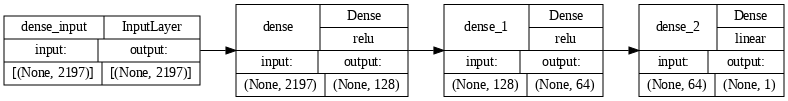

In [58]:
from keras.utils import plot_model
# keras.utils.plot_model을 통해 모델의 구조를 출력할 수 있습니다.
plot_model(rating_model, rankdir='LR', dpi=72, show_shapes=True, show_layer_activations=True)

In [59]:
# 각층 층별 가중치 수입니다. Weight = 입력수 × 출력수. Bias = 유닛수(밀도층인 경우, 유닛수 = 출력수)
print(
    "dense(은닉층 1): 2197×128 + 128 = {}".format(2197 * 128 + 128), # Weight + bias(절편)
    "dense_1(은닉층 2): 128×64 + 64 = {} ".format(128 * 64 + 64),
    "dense_2(출력층): 64×1 + 1 = {}".format(64 * 1 + 1)
)

dense(은닉층 1): 2197×128 + 128 = 281344 dense_1(은닉층 2): 128×64 + 64 = 8256  dense_2(출력층): 64×1 + 1 = 65


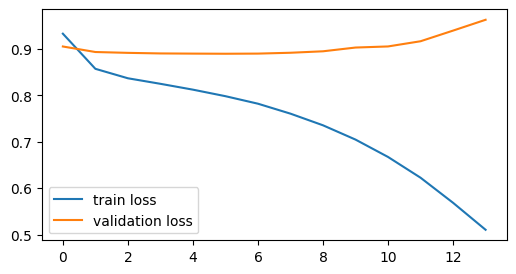

In [60]:
# 학습 그래프를 출력합니다.
# 각 epoch별 학습 손실과 평가 손실을 확인하여, 모델의 일반화 성능을 가늠합니다.
plt.figure(figsize=(6, 3))
plt.plot(train_hist.history['loss'][1:], label='train loss')
plt.plot(train_hist.history['val_loss'][1:], label='validation loss')
plt.legend()
plt.show()

In [61]:
# 평가합니다.(평가 데이터에 대한 성능을 측정합니다.)
from sklearn.metrics import mean_squared_error
prd_test = rating_model.predict(ds_ratings_test.batch(1024), verbose=False)
mean_squared_error(df_ratings_test['rating'], prd_test.ravel())

0.9883053166500803

**신경망에서 과적합 발생 시 가장 먼저 시도해볼일**

과적합 현상이 발생한다면, 가장 먼저 학습율을 낮추어봅니다.

→ 규제를 꺼내어봅니다.

In [62]:
#  epoch 3이후에 과적합이 진행되고 있습니다. 학습율을 낮추어 과적합 현상을 완화시켜봅니다.

tf.keras.backend.clear_session()

rating_model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='HeNormal'),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='HeNormal'),
    tf.keras.layers.Dense(1),
])

rating_model2.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003) # 학습율을 0.001에서 0.0003으로 낮추어 진행합니다.
)
train_hist = rating_model2.fit(ds_ratings_train.batch(1024).shuffle(102400), validation_data=ds_ratings_val.batch(256), epochs=15)

Epoch 1/15
63/63 [==============================] - 5s 41ms/step - loss: 11.3929 - val_loss: 7.5012
Epoch 2/15
63/63 [==============================] - 3s 37ms/step - loss: 3.4943 - val_loss: 1.3076
Epoch 3/15
63/63 [==============================] - 3s 36ms/step - loss: 1.1829 - val_loss: 1.0806
Epoch 4/15
63/63 [==============================] - 3s 36ms/step - loss: 1.0072 - val_loss: 0.9787
Epoch 5/15
63/63 [==============================] - 3s 36ms/step - loss: 0.9237 - val_loss: 0.9325
Epoch 6/15
63/63 [==============================] - 3s 39ms/step - loss: 0.8821 - val_loss: 0.9108
Epoch 7/15
63/63 [==============================] - 3s 36ms/step - loss: 0.8602 - val_loss: 0.9009
Epoch 8/15
63/63 [==============================] - 3s 36ms/step - loss: 0.8469 - val_loss: 0.8961
Epoch 9/15
63/63 [==============================] - 3s 36ms/step - loss: 0.8383 - val_loss: 0.8935
Epoch 10/15
63/63 [==============================] - 3s 36ms/step - loss: 0.8322 - val_loss: 0.8918
Epoch 11

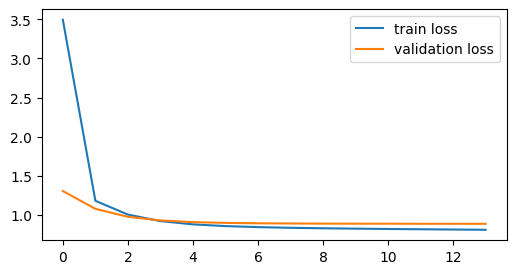

In [63]:
plt.figure(figsize=(6, 3))
plt.plot(train_hist.history['loss'][1:], label='train loss')
plt.plot(train_hist.history['val_loss'][1:], label='validation loss')
plt.legend()
plt.show()

In [64]:
prd_test = rating_model2.predict(ds_ratings_test.batch(1024), verbose=False)
del ds_ratings_train, ds_ratings_val, ds_ratings_test
mean_squared_error(df_ratings_test['rating'], prd_test.ravel())

0.9152580092825366

### 임베딩층(Embedding layer)

임베딩층은 텍스트나 범주형 데이터와 같은 이산형(Discrete) 데이터를 연속형 벡터로 변환시켜주는 층입니다.

※ 임베딩은 좀 더 포괄적인 의미에서 복잡도가 높은 데이터를 저차원의 연속형 벡터로 변환한 값을 의미합니다.


#### 임베딩층의 구성

입력: 다수의 범주의 위치인덱스를 입력을 받습니다.

가중치: 범주수와 범주 사전 외의 범주수(Out of vacabulary. OOV) 만큼의 임베딩 벡터로 구성됩니다.

> $(\text{범주수} + \text{OOV}) × \text{임베딩 벡터 크기}$

출력: 입력 범주수 × 임베딩 벡터 크기

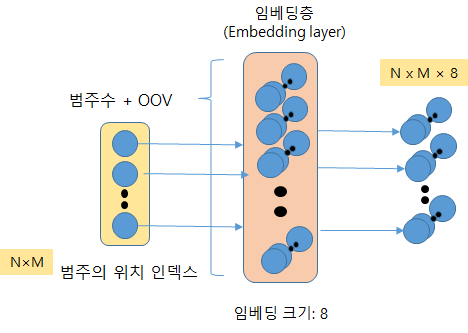


#### 특징

- 범주형 데이터를 가변수로 표현하려면 범주의 개수 만큼의 변수가 필요합니다. 임베딩층은 고차원의 벡터를 보다 저차원의 밀집 벡터 형태로 표현하여 보다 효율적인 데이터의 표현을 할 수 있습니다.


- 학습이 되고 나면 임베딩은 학습 데이터에서 범주들이 지닌 특징들을 지니게 됩니다. 이 임베딩을 공유를 통해 활용의 폭을 넓혀 갈 수 있습니다.

**[Ex.3]**

[Ex.2]에서의 모델을 임베딩층을 활용해 바꾸어봅니다.  user id와 item id를 가변수화 대신에 임베딩층으로 바꿉니다.

user id의 임베딩 벡터의 크기는 8, item id의 임베딩 벡터의 크기 8 입니다.

In [65]:
df_ratings_train['user id'].nunique(), df_ratings_train['item id'].nunique()

(943, 1613)

In [66]:
# 사용자 모델을 만듭니다. user id에 대한 임베딩을 출력하는 모델을 구성합니다.

# 사용자 ID에서 임베딩 Vocabulary로 사용할 것만 뽑아봅니다: Ex2와 동일한 조건으로 df_ratings_train에서 총 5회 이상 등장한 ID만 선택합니다..
user_vocab = df_ratings_train['user id'].value_counts().pipe(lambda x: x.loc[x >= 5].index.values)

# tf.keras.layers.IntegerLookup  vocabulary의 내용을 바탕으로 입력을 위치 인덱스로 바꾸어주는 층입니다.
# vocbulary에 없는 입력을 받으면 0을 반환합니다.
# tf.keras.layers.Embedding(범주의 수, 임베딩 벡터수): 임베딩층을 생성합니다.
user_model = tf.keras.models.Sequential([
    tf.keras.layers.IntegerLookup(
        vocabulary = user_vocab
    ), #  N×1 사용자 ID의 위치 인덱스
    tf.keras.layers.Embedding(len(user_vocab) + 1, 8), # N×1×8 사용자 ID의 임베딩
    tf.keras.layers.Flatten() # N×8
])

In [67]:
# user_model읭 첫번째 층은 tf.keras.layers.IntegerLookup입니다. 입력과 출력이 무엇인지 확인해봅니다.
# user id에 대한 위치인덱스가 나오고, vocabulary에 속하지 않으면 0을 반환하게 됩니다.
user_model.layers[0]([[1], [2], [3], [1], [-1]])

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[ 76],
       [470],
       [542],
       [ 76],
       [  0]])>

In [68]:
# user_model의 출력을 확인해봅니다: user id에 해당하는 임베딩 벡터가 나오면 됩니다.
user_model([[1], [2], [3], [1], [-1]])

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.00620373,  0.03076352, -0.04255674, -0.02088888, -0.04201931,
         0.00679563,  0.02489538,  0.02330703],
       [-0.02846435,  0.01371958, -0.03339063,  0.02602133, -0.03214063,
        -0.01500339, -0.010276  ,  0.00926735],
       [-0.03797393, -0.03804448, -0.03338927, -0.00545797,  0.04124881,
        -0.00836198, -0.04745559, -0.03038839],
       [-0.00620373,  0.03076352, -0.04255674, -0.02088888, -0.04201931,
         0.00679563,  0.02489538,  0.02330703],
       [-0.02629272,  0.01439912,  0.00681562, -0.01887414, -0.01784807,
         0.00191944, -0.03144686,  0.04681731]], dtype=float32)>

In [69]:
# 사용자 모델과 동일한 방법으로 영화 모델도 구성합니다.

movie_vocab = df_ratings_train['user id'].value_counts().pipe(lambda x: x.loc[x >= 5].index.values)
movie_model = tf.keras.models.Sequential([
    tf.keras.layers.IntegerLookup(
        vocabulary = movie_vocab
    ),
    tf.keras.layers.Embedding(len(movie_vocab) + 1, 8), # N×1×8
    tf.keras.layers.Flatten() # N×8
])

In [70]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ('pt', 'passthrough', ['user id', 'item id']), # user id와 item id는 별처리 없이 통과되어 첫번째에 user id가 두번째에 item id가 출력되게 됩니다.
    ('ohe', OneHotEncoder(drop='first', min_frequency=5, sparse_output=False, handle_unknown='ignore'), ['gender', 'occupation']),
    ('std', StandardScaler(), ['age'])
])
ds_ratings2_train = tf.data.Dataset.from_tensor_slices(
    (ct.fit_transform(df_ratings_train), df_ratings_train['rating'])
)
ds_ratings2_val = tf.data.Dataset.from_tensor_slices(
    (ct.transform(df_ratings_val), df_ratings_val['rating'])
)
ds_ratings2_test = tf.data.Dataset.from_tensor_slices(
    (ct.transform(df_ratings_test), df_ratings_test['rating'])
)

In [71]:
# 입력 변수의 수가 2197개에서 24개로 줄어듭니다.
ds_ratings2_train.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(24,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [72]:
# user id는 user_model에 전달하고,
# item id는 movie_model에 전달하고,
# 두 모델의 출력값과 나머지 변수(genre, occupation 가변수, ...) 결합시켜 밀도층에 전달하는 모델을 만듭니다.
class RatingModel(tf.keras.Model):
    def __init__(self, user_model,item_model):
        super().__init__()
        self.user_model = user_model
        self.item_model = item_model
        self.concat_layer = tf.keras.layers.Concatenate(axis=-1) # user_model, movie_model, 나머지 변수 세 개의 Tensor를 결합해주는 결합층입니다.

    def call(self, X, training=False):
        # X: N × 24
        X_user = self.user_model(X[:, :1], training=training) # 첫번째에 있는 user id를 slicing으로 떼어 내어 user_model에 전달합니다. N × 사용자 임베딩 사이즈
        X_item = self.item_model(X[:, 1:2], training=training) # 두번째에 있는 item id를 slicing으로 떼어 내어 movie_model에 전달합니다. N × 영화 임베딩 사이즈
        X_all = self.concat_layer([X_user,  X_item, X[:, 2:]]) # 두 모델의 출력, 그리고 나머지 변수들을 결합하여 하나의 Tensor로 만듭니다. N × (사용자 임베딩 사이즈 + 영화 임베딩 사이즈 + 22)
        return X_all

In [73]:
tf.keras.backend.clear_session()
# 사용자 모델을 생성합니다.
user_vocab = df_ratings_train['user id'].value_counts().pipe(lambda x: x.loc[x >= 5].index.values)
user_model = tf.keras.models.Sequential([
    tf.keras.layers.IntegerLookup(
        vocabulary = user_vocab
    ), # N×1 사용자 ID의 위치 인덱스
    tf.keras.layers.Embedding(len(user_vocab) + 1, 8), # N×1×16 사용자 ID의 임베딩
    tf.keras.layers.Flatten() # N×8
])

# 영화 모델을 생성합니다.
item_vocab = df_ratings_train['item id'].value_counts().pipe(lambda x: x.loc[x >= 5].index.values)
movie_model = tf.keras.models.Sequential([
    tf.keras.layers.IntegerLookup(
        vocabulary = item_vocab
    ),
    tf.keras.layers.Embedding(len(item_vocab) + 1, 8), # N×1×8
    tf.keras.layers.Flatten() # N×8
])

# RatignModel과 밀도신경망들을 순차적으로 연결 시킨 평점 모델을 만듭니다.
rating_model_emb = tf.keras.models.Sequential([
    RatingModel(user_model, movie_model), # N×38, 38 = 8 + 8 + 22
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='HeNormal'),  # N×32
    tf.keras.layers.Dense(16, activation='relu', kernel_initializer='HeNormal'), # N×16
    tf.keras.layers.Dense(1), # N×1
])

In [74]:
rating_model_emb.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)
)
train_hist = rating_model_emb.fit(ds_ratings2_train.shuffle(102400).batch(1024), validation_data=ds_ratings2_val.batch(256), epochs=50, verbose=0)

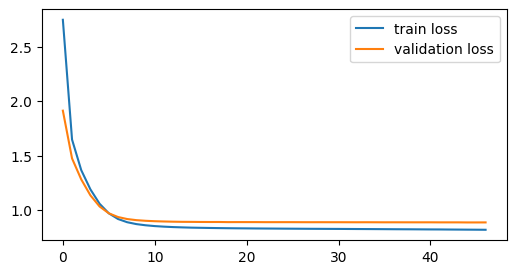

In [75]:
plt.figure(figsize=(6, 3))
plt.plot(train_hist.history['loss'][3:], label='train loss')
plt.plot(train_hist.history['val_loss'][3:], label='validation loss')
plt.legend()
plt.show()

In [76]:
prd_test = rating_model_emb.predict(ds_ratings2_test.batch(1024), verbose=False)
mean_squared_error(df_ratings_test['rating'], prd_test.ravel())

0.9130170102342334

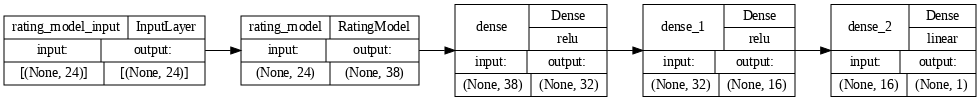

In [77]:
# 임베딩을 활용한 모델의 구조를 출력합니다.
plot_model(rating_model_emb, rankdir='LR', dpi=72, show_shapes=True, show_layer_activations=True)

### 컨볼루션층(Convolutional layer)

 데이터의 위치와 관련된 패턴을 합성곱 연산을 통해 나타냅니다.

- 영역이 지닌 특징이나 위치상 전후 관계에서 드러나는 특징을 커널로 나타냅니다.


- 이러한 특징으로 이미지 처리, 자연어 처리, 음성 처리 등 전후 관계가 있거나, 영역에 특징이 드러나는 데이터에 주로 쓰입니다.


커널의 차원에 따라서, 1차원 컨볼루션과 2차원 컨볼루션, ... 이 있습니다.

아래 설명은 2차원 컨볼루션을 기준으로 설명합니다.

#### 합성곱(Convolution)

**합성곱의 정의**

- 연속 변수: 연속 변수 t를 기준으로 g 함수의 전후의 출력값과 커널 함수 f와 곱과의 적분으로 정의됩니다.
$(f * g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t - \tau) d\tau$,


-  이산 변수: 이산 변수 n를 기준으로 g함수의 전후의 출력값과 커널 함수와 곱과의 합으로 정의됩니다.
$(f * g)[n] = \sum_{m=-\infty}^{\infty} f[m]g[n - m]$,

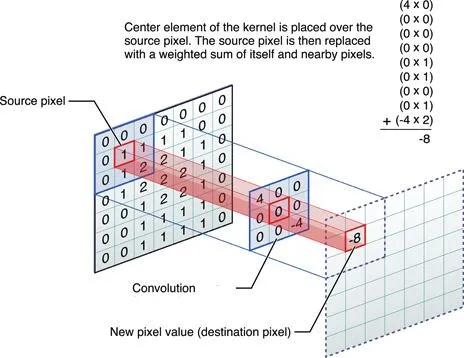

※ 이미지 출처: https://medium.com/@bdhuma/6-basic-things-to-know-about-convolution-daef5e1bc411

### 구성 요소

1. 커널(Kernel): 합성곱 연산에서의 가중치 행렬

> 커널 형태: 2 차원 이상의 컨볼루션 층은 보통 정사각 형태 하고 있습니다.
>
> 커널 수:입력의 채널수 × 출력의 채널 수
>
> 가중치: 커널 크기에 해당하는 텐서가 필터 수 만큼 있습니다.절편은 필터 마다 하나 씩 있습니다.


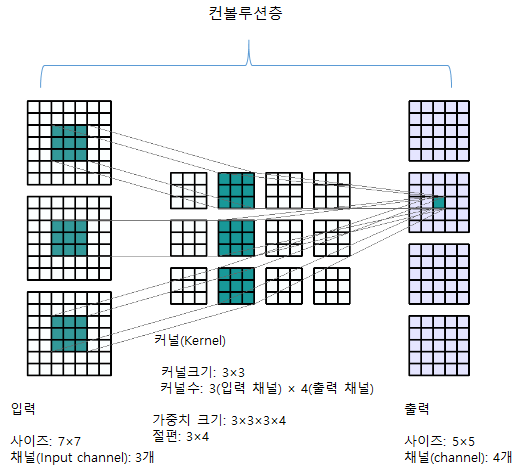


※ 이미지 출처: https://towardsdatascience.com/conv2d-to-finally-understand-what-happens-in-the-forward-pass-1bbaafb0b148

2. 패딩(Padding)

- 입력의 상하좌우에 실제 데이터외의 추가된 데이터

- 보통 입력의 크기와 출력의 크기를 유지하기 위해 사용됩니다.

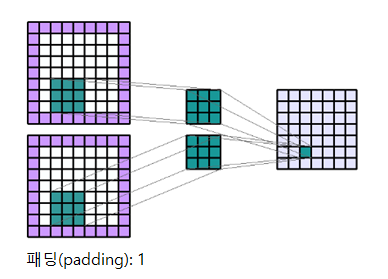

3. 보폭(Stride)

- 필터가 입력 데이터를 이동하는 간격입니다.

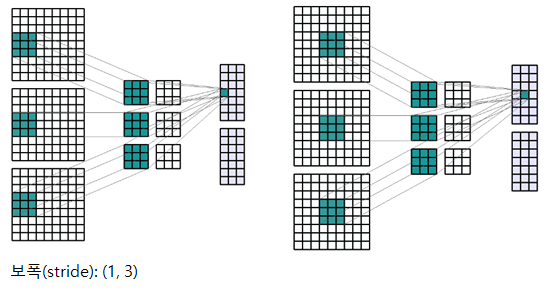

**출력 채널의 크기**

합성곱 연산 후 출력 채널의 크기가 O 라고 하면,

$O = \frac{(N + 2 × P) - F}{S} + 1$, $N$: 입력 채널 크기, $P$: 패딩, $F$: 필터 크기, $S$: 보폭

**[Ex.4]**

Tensorflow에 내장된 MNIST 데이터셋을 활용합니다.  

MNIST 데이터는 0에서 9사이의 숫자에 대한 손글씨를 28×28 사이즈의 흑백 이미지로 담은 데이터입니다.

이 데이터셋은 학습데이터와 평가데이터가 이미 나누어진 상태로 제공됩니다. 학습데이터는 총 60,000개, 평가데이터는 10,000로 구성되었습니다.

학습데이터 중에서 20%는 검증 데이터로 구성을 합니다.  28×28 흑백 이미지로 된  0~9까지의 숫자 손글씨를 인식하는  인공신경망 모델을 아래 제시된 구조로 만듭어 학습해봅니다.

손실함수는 크로스엔트로피를 사용합니다.

In [78]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
idx = int(X_train.shape[0] * 0.2)
X_val, y_val = X_train[:idx], y_train[:idx]
X_train, y_train = X_train[idx:], y_train[idx:]

# Tensorflow 데이터셋을 만들어 줍니다.
# 이 과정에서 reshape을 통해 채널을 나타내는 배열의 차원을 추가합니다.
# 그리고 스캐일을 0과 1사이로 조정하기 위해 255로 나누어 줍니다.
ds_mnist_train = tf.data.Dataset.from_tensor_slices(
    (X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0, y_train)
)
ds_mnist_val = tf.data.Dataset.from_tensor_slices(
    (X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0, y_val)
)
ds_mnist_test = tf.data.Dataset.from_tensor_slices(
    (X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0, y_test)
)

11490434/11490434 [==============================] - 0s 0us/step


In [79]:
X_train.shape, X_val.shape, X_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [80]:
ds_mnist_train.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

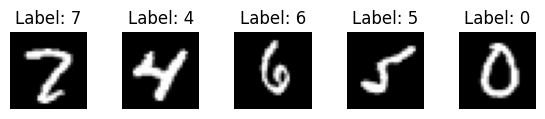

In [81]:
# 학습 데이터셋에서 이미지 출력합니다.
num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(7, 1))

for i in range(num_images):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')

plt.show()

인공 신경망 구조

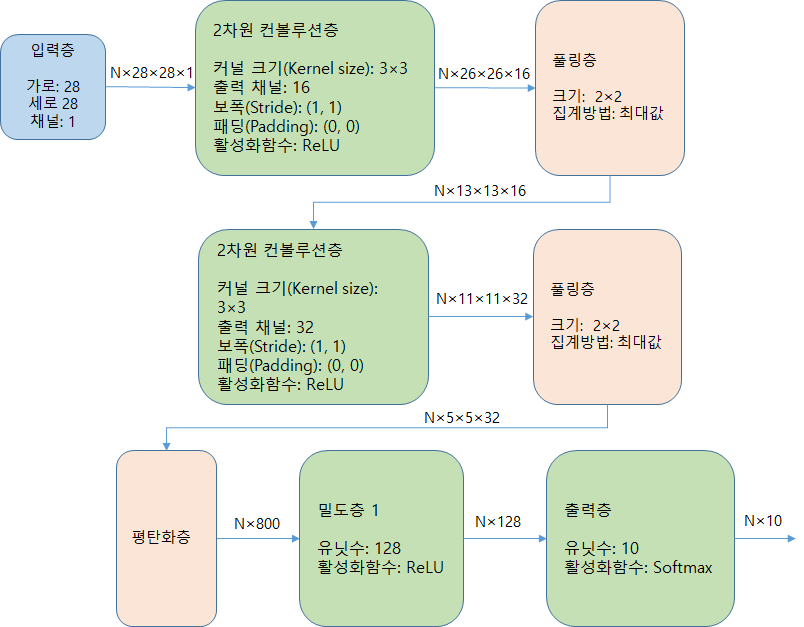

In [82]:
tf.keras.backend.clear_session()
# tf.keras.layers.Conv2D: filters: 출력채널수, kernel_size: 필터 크기, padding: valid = no padding, 'same' = 출력의 크기가 동일토록 설정
# tf.keras.layers.MaxPooling2D: pool_size-풀링 연산에 사용될 입력크기
# tf.keras.layers.Flatten: 입력의 크기를 1차원(배치(Batch) 제외)으로 평탄화
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='HeNormal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='HeNormal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),  # 1차원으로 펼칩니다.
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='HeNormal'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# tf.keras.losses.SparseCategoricalCrossentropy - 대상 변수가 Sparse(레이블 인코딩 되어 0시작하는 클래스 번호로 된 형태)일 때의 CrossEntorpy 손실을 나타냅니다.
# from_logits: 손실함수 입력의 Logit 여부
mnist_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # softmax로 출력이 되도록 했으므로 from_logits=False입니다.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics = ['accuracy']
)

train_mnist_hist = mnist_model.fit(ds_mnist_train.batch(64), validation_data=ds_mnist_val.batch(64), epochs=10)

Epoch 1/10
750/750 [==============================] - 21s 27ms/step - loss: 0.2432 - accuracy: 0.9287 - val_loss: 0.1032 - val_accuracy: 0.9680
Epoch 2/10
750/750 [==============================] - 19s 25ms/step - loss: 0.0714 - accuracy: 0.9782 - val_loss: 0.0724 - val_accuracy: 0.9768
Epoch 3/10
750/750 [==============================] - 20s 26ms/step - loss: 0.0497 - accuracy: 0.9852 - val_loss: 0.0591 - val_accuracy: 0.9806
Epoch 4/10
750/750 [==============================] - 19s 25ms/step - loss: 0.0379 - accuracy: 0.9889 - val_loss: 0.0530 - val_accuracy: 0.9843
Epoch 5/10
750/750 [==============================] - 20s 26ms/step - loss: 0.0300 - accuracy: 0.9912 - val_loss: 0.0489 - val_accuracy: 0.9854
Epoch 6/10
750/750 [==============================] - 20s 27ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.0469 - val_accuracy: 0.9862
Epoch 7/10
750/750 [==============================] - 20s 27ms/step - loss: 0.0190 - accuracy: 0.9948 - val_loss: 0.0463 - val_accuracy:

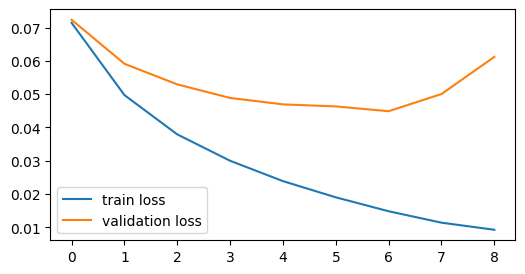

In [83]:
plt.figure(figsize=(6, 3))
plt.plot(train_mnist_hist.history['loss'][1:], label='train loss')
plt.plot(train_mnist_hist.history['val_loss'][1:], label='validation loss')
plt.legend()
plt.show()

In [84]:
from sklearn.metrics import accuracy_score
y_prd = mnist_model.predict(ds_mnist_test.batch(64))
mnist_test_acc = accuracy_score(y_test, np.argmax(y_prd, axis=1))
mnist_test_acc

157/157 [==============================] - 1s 8ms/step


0.9846

In [85]:
# 가중치의 수를 확인합니다.
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

첫 번쨰 컨볼루션층의 가중치 수: 1 × 16 × 3 × 3 + 16 = 144 + 16 = 160, 입력채널수 × 출력채널수 × 커널의 가로 크기 × 커널 세로 크기 + 출력 채널수

두 번쨰 컨볼루션층의 가중치 수: 16 × 32 × 3 × 3 + 32 = 4608 + 32 = 4640

첫 번째 밀도층의 가중치 수: 800 × 128 + 128 = 102400 + 128 = 102528

두 번째 밀도층의 가중치 수: 128 × 10 + 10 = 1280 + 10 = 1290

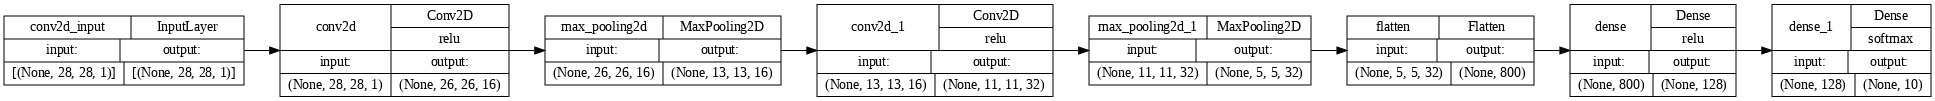

In [86]:
from keras.utils import plot_model
plot_model(mnist_model, rankdir='LR', dpi=72, show_shapes=True, show_layer_activations=True)

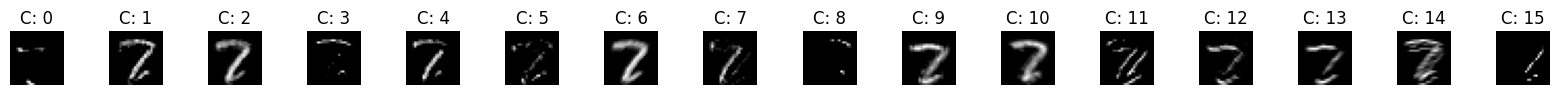

In [87]:
# 첫번째 컨볼루션층을 통했을 때의 출력입니다. 위 이미지 중에 첫번째(숫자 7)
num_images = 16
fig, axes = plt.subplots(1, num_images, figsize=(16, 1))
output_layer1 = mnist_model.layers[0](np.expand_dims(X_train[:1], axis=-1).astype('float32')).numpy()
for i, ax in zip(range(num_images), axes):
    ax.imshow(output_layer1[0, :, :, i].reshape(26, 26), cmap='gray')
    ax.set_title('C: {}'.format(i))
    ax.axis('off')

plt.tight_layout()
plt.show()

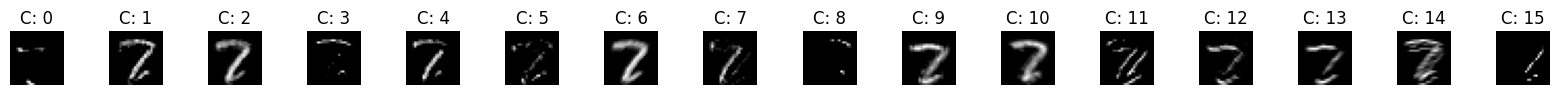

In [88]:
# 첫번째 컨볼루션층을 통했을 때의 출력입니다. 위 이미지 중에 첫번째(숫자 7)
num_images = 16
fig, axes = plt.subplots(1, num_images, figsize=(16, 1))
output_layer1 = mnist_model.layers[0](np.expand_dims(X_train[:1], axis=-1).astype('float32')).numpy()
for i, ax in zip(range(num_images), axes):
    ax.imshow(output_layer1[0, :, :, i].reshape(26, 26), cmap='gray')
    ax.set_title('C: {}'.format(i))
    ax.axis('off')

plt.tight_layout()
plt.show()

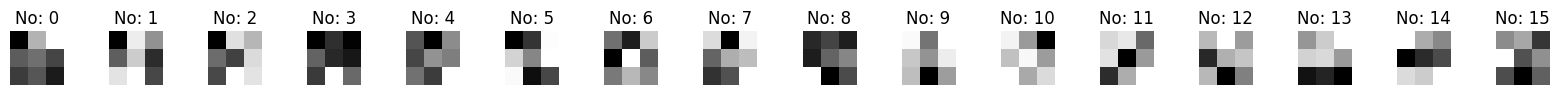

In [89]:
# 첫번째 컨볼루션층의 필터입니다.
num_images = 16
fig, axes = plt.subplots(1, num_images, figsize=(16, 1))
weights = mnist_model.layers[0].get_weights()[0]
for i, ax in zip(range(num_images), axes):
    ax.imshow(weights[:, :, 0, i].reshape(3, 3), cmap='gray')
    ax.set_title('No: {}'.format(i))
    ax.axis('off')

plt.tight_layout()
plt.show()

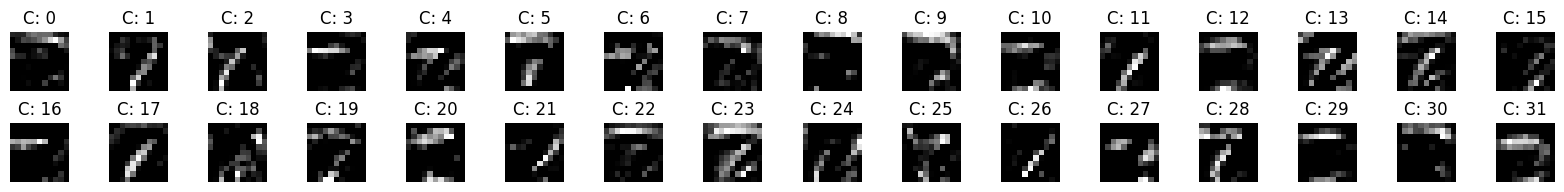

In [90]:
# 두번째 컨볼루션층을 통했을 때의 출력입니다.
num_images = 32
fig, axes = plt.subplots(2, num_images // 2, figsize=(16, 2))
output_layer1 = mnist_model.layers[0](np.expand_dims(X_train[:1], axis=-1).astype('float32'))
output_layer2 = mnist_model.layers[2](mnist_model.layers[1](output_layer1)).numpy()
for i, ax in zip(range(num_images), axes.ravel()):
    ax.imshow(output_layer2[0, :, :, i].reshape(11, 11), cmap='gray')
    ax.set_title('C: {}'.format(i))
    ax.axis('off')
plt.tight_layout()
plt.show()

###  순환신경망(Recurrent Neural Network)

순환 신경망의  입출력에는 순환 구조를 지니고 있습니다. 출력이 다음 단계의 입력으로 사용됩니다.

- 순환 신경망은 시퀀스 데이터의 패턴을 나타내는 데 사용됩니다.


- 이전 단계까지의 정보를 현재 단계에 반영하여 예측을 수행합니다.


- 시점별로 처리할 유닛이 할당할 필요없이 시점과 관계없이 하나의 가중치 집합이 공유되기 때문에 데이터 처리의 효율을 높힐 수 있습니다.

→ 이러한 특성은 자연어 처리, 음성 인식, 시계열 데이터 분석 등의 순서적 특징 지니는 데이터를 모델하는 데 많이 쓰입니다.


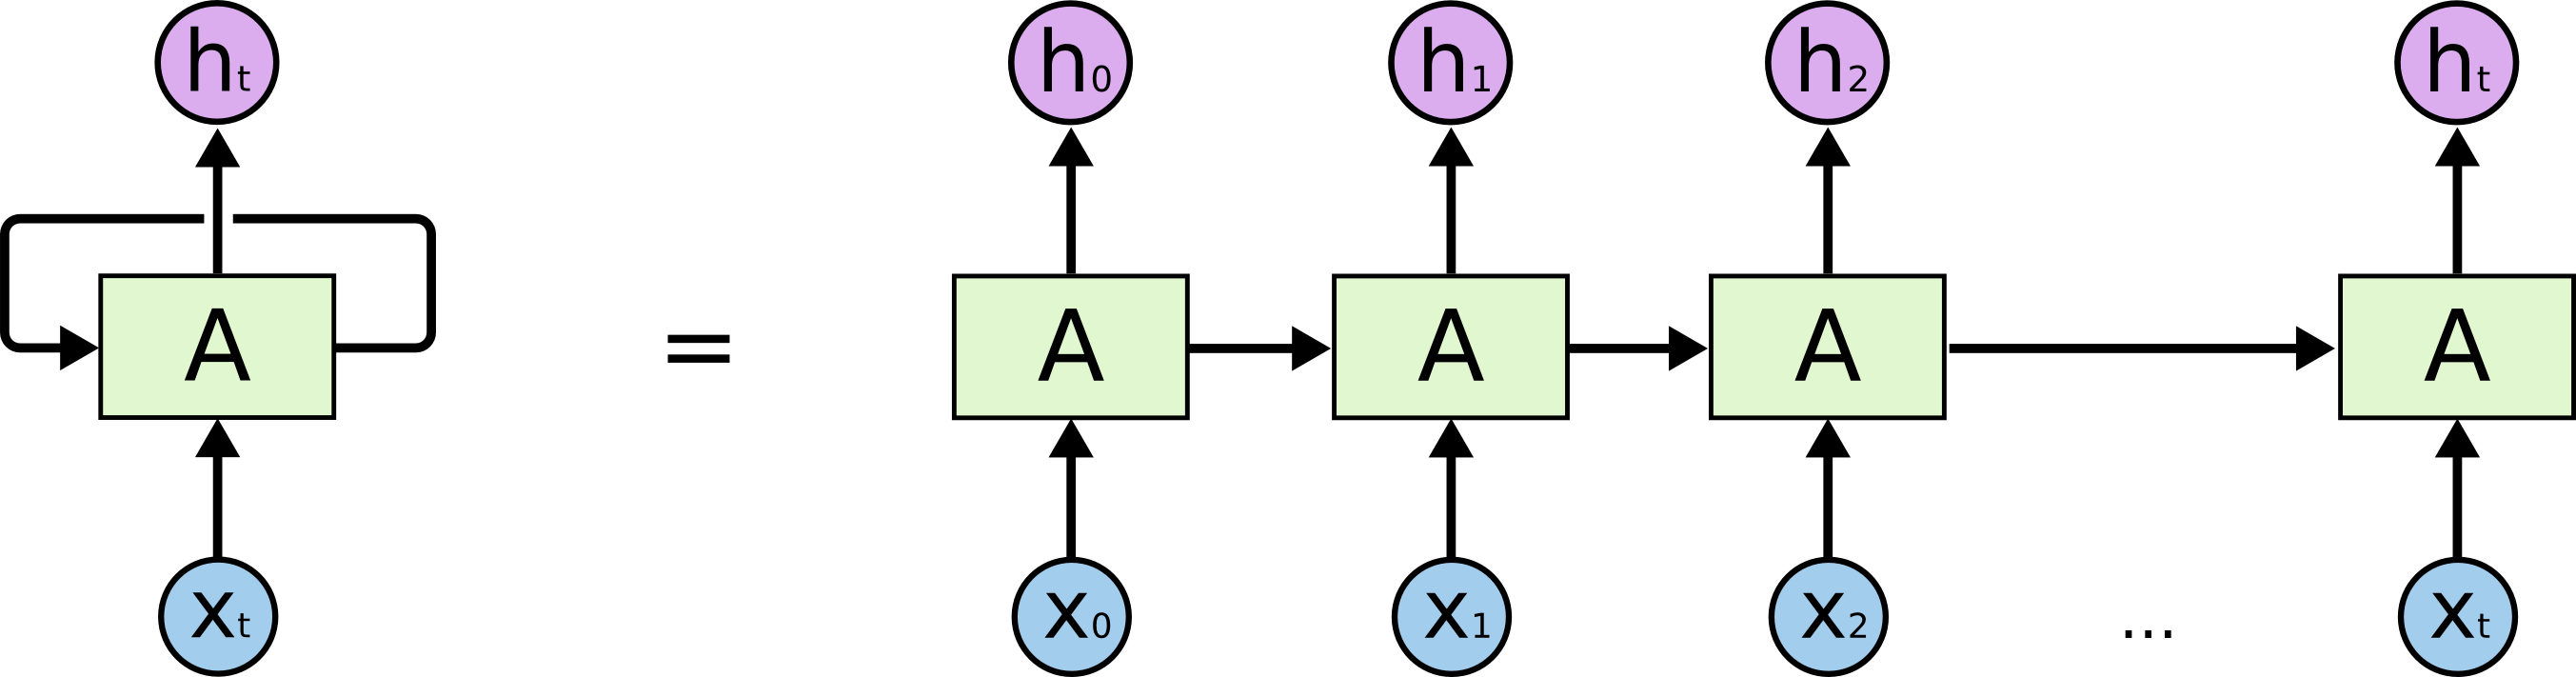

이미지 출처: https://magenta.tensorflow.org/2016/06/10/recurrent-neural-network-generation-tutorial

### 시퀀스데이터 모델링 유형


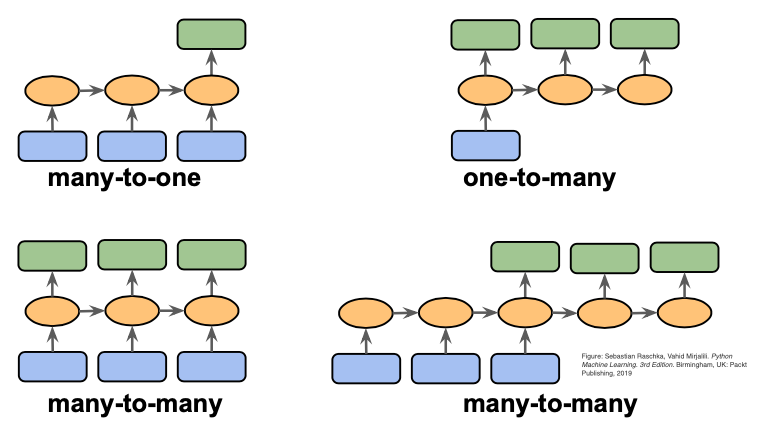

※이미지 출처: https://deeplearningmath.org/sequence-models

1. many-to-one: 여러 개의 입력으로 하나의 출력을 얻는 작업

> 감성 분석

2. one-to-many: 하나 입력으로 여러개의 출력을 얻는 작업

> 이미지 캡셔닝

3. many-to-many I: 여러 입력에 각각에 대한 출력을 동시에 얻는 작업

> 비디오 캡셔닝

4. many-to-many II: 여러 입력을 받은 후에 출력을 얻는 작업

> 기계 번역

### 게이트 유닛(Gate Unit)

#### 단순 입출력 순환 구조의 문제점

1. 장기 의존성 문제(Long-Term Dependencies)

  이전 단계에서의 정보가 단계가 늘어날수록 올바르게 전달이 되지 않아, 장기적 의존성을 학습하기 어렵습니다.


2. 기울기 소실 및 폭증 문제(Vanishing Gradient, Exploding Gradient)

  이전 단계의 출력의 행렬곱으로 현재 단계의 출력을 만드는 과정이 반복되면서 기울기가 심하게 줄거나 커지는 문제가 발생합니다.


이러한 문제를 해결하기 위해 상태 기억이나 리셋의 역할을 해주는 게이트(Gate)를 추가한 순환 신경망이 고안됩니다.

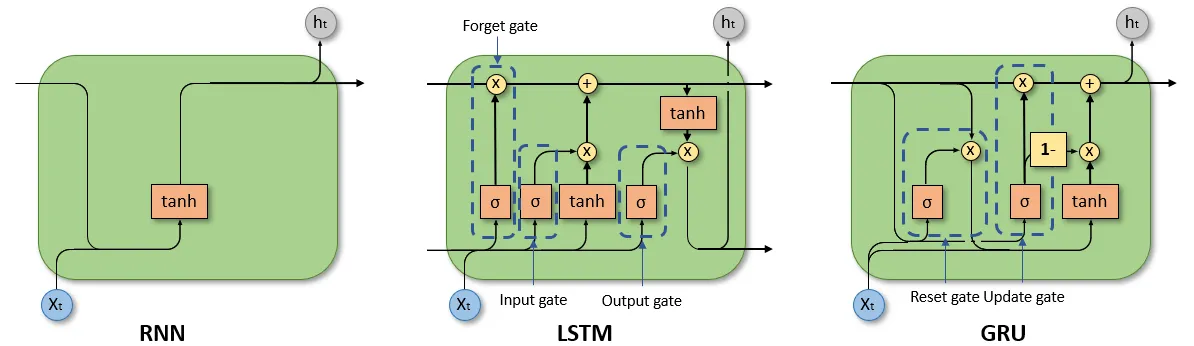

#### LSTM

기억 게이트, 망각 게이트 그리고 출력 게이트가 존재합니다.

정보의 흐름을 구성된 게이트들을 통하여 관리가 됩니다.

- 기억 게이트와 망각 게이트를 도입하여 장기 의존성 문제를 해결합니다.


- 셀 상태(cell state)라는 추가적인 상태를 가지며, 정보를 장기적으로 보유하는 역할을 합니다.


- 망각 게이트는 통해 정보의 유지와 갱신을 제어합니다.


- 계산량 많습니다.


- 학습 속도 느립니다.

#### GRU

업데이트 게이트(update gate)와 리셋 게이트(reset gate)로 구성이 되었습니다.

LSTM보다 간단한 구조르 가지고 있어 속도가 빠르고, 경제적입니다.

- 업데이트 게이트는 현재 입력을 기반으로 이전 상태를 얼마나 유지할지를 제어합니다.

- 리셋 게이트(reset gate)는 이전 상태의 일부를 얼마나 무시할 지 결정합니다.




이후 예제에서 df_dino 데이터셋에서 Name을 소문자로 변환하고, 철자 단위로 입력을 받는 모델을 만들어 갈 것입니다. 예를 들어 공룡의 이름이

Aardonyx 라면, 입력은 'a', 'a', 'r', 'd', 'o', 'n', 'y', 'x' 가 됩니다.  

신경망에 입력이 될 수 있도록 알파벳을 정수로 나타냅니다. 'a'→3, 'b'→4, 'c'→5, 'd'→6,... 그리고,

여기에 단어의 시작을 알리는 숫자 1, 끝을 알리는 숫자 2, 그리고 여백을 나타내는 숫자를 0으로 나타냅니다.

이러한 과정까지 거치면,

'a', 'a', 'r', 'd', 'o', 'n', 'y', 'x'

→  1(단어시작), 3, 3, 20, 6, 17, 16, 27, 27, 2(단어의 끝), 0, 0, ....  

와 같이 인코딩이 됩니다.

입력의 수는 Name의 최대 길이 + 2(시작, 끝을 나타내는 입력  포함) 가 됩니다.

Name에서 남는 영역은 0으로 채웁니다.

In [91]:
df_dino['Name'].apply(lambda x: x).head()

0         Aardonyx
1      Abelisaurus
2    Abrictosaurus
3       Abrosaurus
4      Abydosaurus
Name: Name, dtype: object

In [92]:
# 철자들을 분해하여, Integer로 된 숫자 인덱스 형식으로 만들어, 입력 데이터로 만들어 줍니다.

df_dino['Name_idx'] = df_dino['Name'].str.lower().str.strip().apply(lambda x: list(x)) # 이름을 철자별로 분해합니다.
PAD, BOS, EOS = 0, 1, 2 # 여백, 단어시작, 단어끝 인덱스를 정의합니다.
max_name = df_dino['Name_idx'].apply(lambda x: len(x)).max() + 2 # 입력의 수 =  이름의 최대 길이 + 2
chars = np.sort(df_dino['Name_idx'].explode().unique()) # 등장한 문자들을 구합니다.

char_to_idx = {c : (i + 3) for i, c in enumerate(chars)} # 문자를 숫자로 변환 시키는 mapping
idx_to_char = {(i + 3) : c for i, c in enumerate(chars)} # 숫자를 물자로 변환 시키는 mapping

# 알파벳으로된 철자 리스트를 시작은 BOS 끝은 EOS 그리고 여백은 PAD가 들어가도록 인코딩을 시켜줍니다.
df_dino['Name_idx'] = df_dino['Name'].str.lower().str.strip().apply(lambda x: [BOS] + [char_to_idx[i] for i in x] + [EOS] + [PAD] * (max_name - len(x)))
df_dino['Name_idx'].head()

0    [1, 3, 3, 20, 6, 17, 16, 27, 26, 2, 0, 0, 0, 0...
1    [1, 3, 4, 7, 14, 11, 21, 3, 23, 20, 23, 21, 2,...
2    [1, 3, 4, 20, 11, 5, 22, 17, 21, 3, 23, 20, 23...
3    [1, 3, 4, 20, 17, 21, 3, 23, 20, 23, 21, 2, 0,...
4    [1, 3, 4, 27, 6, 17, 21, 3, 23, 20, 23, 21, 2,...
Name: Name_idx, dtype: object

**[Ex.5]**

df_dino에서 공룡의 Name에 규칙성을 가지고 육식공룡(carnivore) 초식공룡(herbivore)를 구분하는 모델을 만들고자 합니다.

이를 위해 철자별로 입력을 받아(Name_idx) 사용하여 공룡의 식성을 육식/초식으로 분류하는  모델을 맞추는 모델을 만들어 봅니다.

이를 위해 many-to-one 시퀀스 형태를 지닌 순환신경망을 사용합니다.

df_dino에서 Diet가 herbivore, carnivore인 경우 만을 뽑아 Diet가 carnivore이면


In [93]:
df_dino['Diet'].value_counts()

herbivore    731
carnivore    354
omnivore      56
unknown       11
Name: Diet, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder
df_dino_diet = df_dino[df_dino['Diet'].isin(['herbivore', 'carnivore'])].assign(
    label = lambda x: (x['Diet'] == 'carnivore').astype('int')
)[['Name_idx', 'label']].rename(columns={'Name_idx': 'input'})
df_dino_diet.head()

,input,label
0,"[1, 3, 3, 20, 6, 17, 16, 27, 26, 2, 0, 0, 0, 0...",0
1,"[1, 3, 4, 7, 14, 11, 21, 3, 23, 20, 23, 21, 2,...",1
2,"[1, 3, 4, 20, 11, 5, 22, 17, 21, 3, 23, 20, 23...",0
3,"[1, 3, 4, 20, 17, 21, 3, 23, 20, 23, 21, 2, 0,...",0
4,"[1, 3, 4, 27, 6, 17, 21, 3, 23, 20, 23, 21, 2,...",0


In [95]:
df_dino.head()

,Name,Period,Diet,Country,Name_kr,Name_idx
0,Aardonyx,Jurassic,herbivore,South Africa,아르도닉스,"[1, 3, 3, 20, 6, 17, 16, 27, 26, 2, 0, 0, 0, 0..."
1,Abelisaurus,Cretaceous,carnivore,South America,아벨리사우르스,"[1, 3, 4, 7, 14, 11, 21, 3, 23, 20, 23, 21, 2,..."
2,Abrictosaurus,Jurassic,herbivore,South Africa,아브릭토사우르스,"[1, 3, 4, 20, 11, 5, 22, 17, 21, 3, 23, 20, 23..."
3,Abrosaurus,Jurassic,herbivore,China,아브로사우르스,"[1, 3, 4, 20, 17, 21, 3, 23, 20, 23, 21, 2, 0,..."
4,Abydosaurus,Cretaceous,herbivore,North America,아비도사우르스,"[1, 3, 4, 27, 6, 17, 21, 3, 23, 20, 23, 21, 2,..."


In [112]:
from sklearn.model_selection import train_test_split
df_dino_diet_train, df_dino_diet_test = train_test_split(df_dino_diet, train_size = 0.8, stratify=df_dino_diet['label'], random_state=123)

df_dino_diet_train, df_dino_diet_val = train_test_split(df_dino_diet_train, train_size = 0.8, stratify=df_dino_diet_train['label'], random_state=123)

ds_dino_diet_train = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_diet_train['input'].values), df_dino_diet_train['label'].values)
)
ds_dino_diet_val = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_diet_val['input'].values), df_dino_diet_val['label'].values)
)

ds_dino_diet_test = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_diet_test['input'].values), df_dino_diet_test['label'].values)
)

In [113]:
tf.keras.backend.clear_session()
dino_diet_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(char_to_idx) + 3, 16),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [114]:
dino_diet_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)
train_hist = dino_diet_model.fit(
    ds_dino_diet_train.shuffle(1000).batch(32), validation_data=ds_dino_diet_val.batch(128),
    epochs=500,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10), # 총 10 epochs 동안 개선이 없으면 종료합니다.
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=0, min_lr=1e-6) # 5 epochs 동안 개선이 없으면 학습률을 현재 학습율에서 0.1배 만큼 낮춥니다.
    ], verbose=0
)

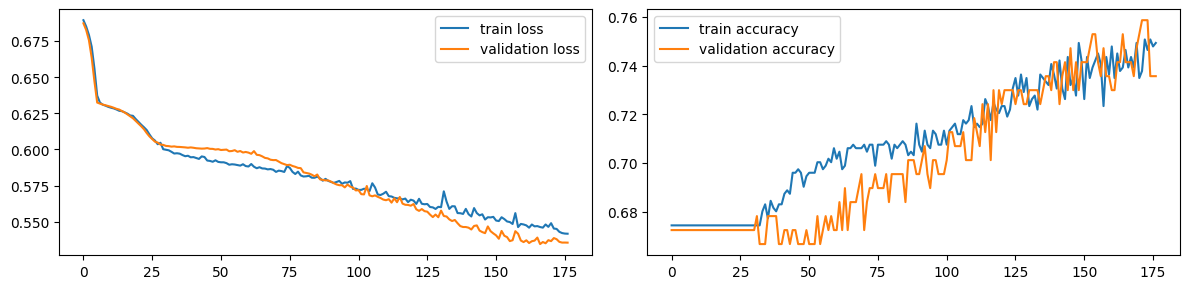

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(train_hist.history['loss'][1:], label='train loss')
axes[0].plot(train_hist.history['val_loss'][1:], label='validation loss')
axes[0].legend()

axes[1].plot(train_hist.history['accuracy'][1:], label='train accuracy')
axes[1].plot(train_hist.history['val_accuracy'][1:], label='validation accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(
    df_dino_diet_test['label'],
    tf.squeeze(dino_diet_model.predict(ds_dino_diet_test.batch(128))) > 0.5
)

2/2 [==============================] - 1s 14ms/step


0.6912442396313364

In [117]:
df_dino_diet_test['label'].value_counts(normalize=True)

0    0.672811
1    0.327189
Name: label, dtype: float64

**[Ex.6]**

Many-to-Many I 구조를 갖습니다.

공룡이름의 앞의 몇 글자를 주면 이후의 공룡 이름을 완성시켜주는 생성형 모델을 만듭니다.

학습시 입력은 공룡의 이름의 철자별로 넣어주고, 출력은 다음 글자로 구성합니다.

즉 이전 글자를 넣으면, 다음 글자를 맞추도록하는 모델을 만들어봅니다.

이러한 구성은 Teacher's forcing 이라는 기법으로 학습을 좀 더 원활하게 해줍니다.

예측시에, 이전의 출력을 현재 입력에 넣어 다음 글자를 예측하여 이름을 완성시켜갑니다.


In [118]:
df_dino_name_gen = pd.concat([
    df_dino['Name_idx'].apply(lambda x: x[:-1]).rename('input'),
    df_dino['Name_idx'].apply(lambda x: x[1:]).rename('target')
], axis=1)
df_dino_name_gen.head()

,input,target
0,"[1, 3, 3, 20, 6, 17, 16, 27, 26, 2, 0, 0, 0, 0...","[3, 3, 20, 6, 17, 16, 27, 26, 2, 0, 0, 0, 0, 0..."
1,"[1, 3, 4, 7, 14, 11, 21, 3, 23, 20, 23, 21, 2,...","[3, 4, 7, 14, 11, 21, 3, 23, 20, 23, 21, 2, 0,..."
2,"[1, 3, 4, 20, 11, 5, 22, 17, 21, 3, 23, 20, 23...","[3, 4, 20, 11, 5, 22, 17, 21, 3, 23, 20, 23, 2..."
3,"[1, 3, 4, 20, 17, 21, 3, 23, 20, 23, 21, 2, 0,...","[3, 4, 20, 17, 21, 3, 23, 20, 23, 21, 2, 0, 0,..."
4,"[1, 3, 4, 27, 6, 17, 21, 3, 23, 20, 23, 21, 2,...","[3, 4, 27, 6, 17, 21, 3, 23, 20, 23, 21, 2, 0,..."


In [119]:
from sklearn.model_selection import train_test_split
df_dino_name_gen_train, df_dino_name_gen_val = train_test_split(df_dino_name_gen, train_size = 0.9)

ds_dino_name_gen_train = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_name_gen_train['input'].values), np.vstack(df_dino_name_gen_train['target'].values))
)
ds_dino_name_gen_val = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_name_gen_val['input'].values), np.vstack(df_dino_name_gen_val['target'].values))
)

In [120]:
from sklearn.model_selection import train_test_split
df_dino_name_gen_train, df_dino_name_gen_val = train_test_split(df_dino_name_gen, train_size = 0.9)

ds_dino_name_gen_train = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_name_gen_train['input'].values), np.vstack(df_dino_name_gen_train['target'].values))
)
ds_dino_name_gen_val = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_name_gen_val['input'].values), np.vstack(df_dino_name_gen_val['target'].values))
)

In [121]:
tf.keras.backend.clear_session()
dino_name_gen_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(char_to_idx) + 3, 16),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(char_to_idx) + 3),
    tf.keras.layers.Softmax(),
])

In [122]:
dino_name_gen_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
train_gen_hist = dino_name_gen_model.fit(
    ds_dino_name_gen_train.shuffle(1000).batch(64), validation_data=ds_dino_name_gen_val.batch(128),
    epochs=500,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, min_delta=0, min_lr=1e-6)
    ], verbose=0
)

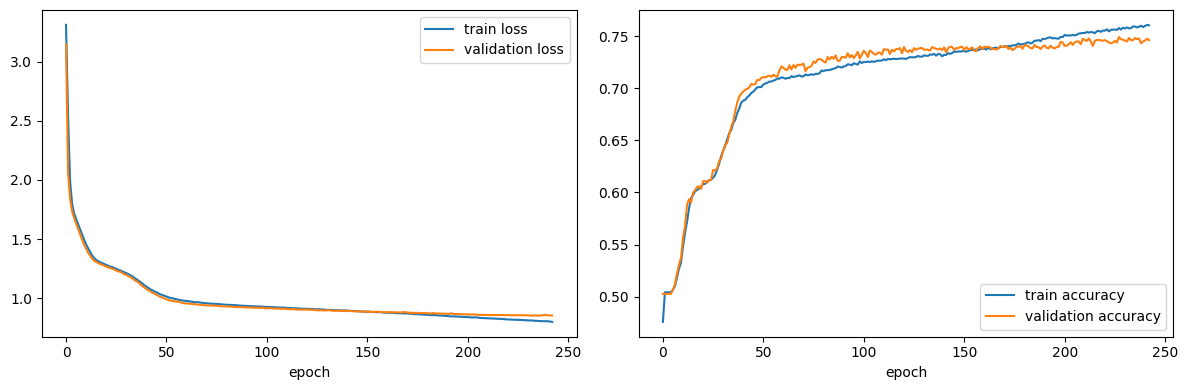

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(train_gen_hist.history['loss'], label='train loss')
axes[0].plot(train_gen_hist.history['val_loss'], label='validation loss')
axes[0].set_xlabel('epoch')
axes[0].legend()

axes[1].plot(train_gen_hist.history['accuracy'], label='train accuracy')
axes[1].plot(train_gen_hist.history['val_accuracy'], label='validation accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend()

plt.tight_layout()
plt.show()

In [129]:
dino_name_gen_model_prd = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=1, batch_size=1),
    tf.keras.layers.Embedding(len(char_to_idx) + 3, 16),
    tf.keras.layers.LSTM(32, return_sequences=True, stateful=True,),
    tf.keras.layers.LSTM(32, return_sequences=True, stateful=True,),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(char_to_idx) + 3),
    tf.keras.layers.Softmax(),
])

In [132]:
dino_name_gen_model_prd.build((1, 1))
for i in [0, 1, 2, 3, 4, 5]:
    dino_name_gen_model_prd.layers[i].set_weights(dino_name_gen_model.layers[i].get_weights())

In [133]:
dino_name_gen_model_prd.reset_states()
prefix_str = 'ty'
temperature = 0.1
prefix = [BOS] + [char_to_idx[i] for i in list((prefix_str.lower()))]
for i in prefix:
    char_idx = tf.squeeze(tf.argmax(dino_name_gen_model_prd(tf.constant([[i]])), axis=-1)).numpy()
gen_name = [idx_to_char[char_idx]]
for i in range(max_name + 3):
    char_idx = tf.squeeze(tf.argmax(dino_name_gen_model_prd(tf.constant([char_idx])), axis=-1)).numpy()
    if char_idx not in idx_to_char:
        break
    gen_name.append(idx_to_char[char_idx])
print(prefix_str + ' ' + ''.join(gen_name))

ty rosaurus


## 가중치가 없는 층


딥 러닝 모델은 복잡한 패턴을 학습하기 위해 많은 뉴런과 층을 사용합니다.


하지만 모델이 복잡해질수록 과적합(overfitting) 문제가 발생할 가능성이 높아집니다.


또한, 파라메터의 경사도가 소실되거나 폭증하기 쉬워집니다.


드롭아웃(Dropout)은 특정 유닛에 의존성을 방지하여 과적합을 방지하고,


배치 정규화(Batch Norm)은 층의 입력을 정규화하여 경사도가 소실하거나 폭증하는 현상을 완화하여 학습이 원할하게 이루어지게 합니다.


풀링(Pooling)은 여러 입력값들을 최대값 또는 평균값으로 집계하여 모델의 복잡도를 줄여 과적합을 방지합니다.


직접적으로 패턴을 나타내는 요소는 아니지만, 인공 신경망 모델에 중요한 기능을 하는 층에 대해서 알아보겠습니다.

### 드롭아웃(Dropout)

과적합을 방지하기 위해 고안된 층입니다.

학습 시 임의의 확률로 유닛을 비활성화(출력을 0으로 설정)하여 역전파 과정에서 해당 유닛의 가중치 업데이트를 차단합니다.

모델이  특정 유닛에 의존하지 않게 하여 다양한 특성을 학습하도록 합니다.

학습 시에만 동작을 하고 테스트나 예측 시에는 비활성화를 하지 않습니다.

드롭아웃의 특성

- 모델의 복잡성을 줄여 과적합을 방지합니다.

- 다양한 특징을 학습토록 합니다.

- 모델이 특성 유닛에 종속하지 않토록 하는 작용은 여러 유닛이 활용되도록 하여 앙상블 효과를 성능 처럼 작용하여 일반화 성능을 향상 시킬 수 있습니다.

보통 0.2에서 0.5의 차단율을 설정합니다.


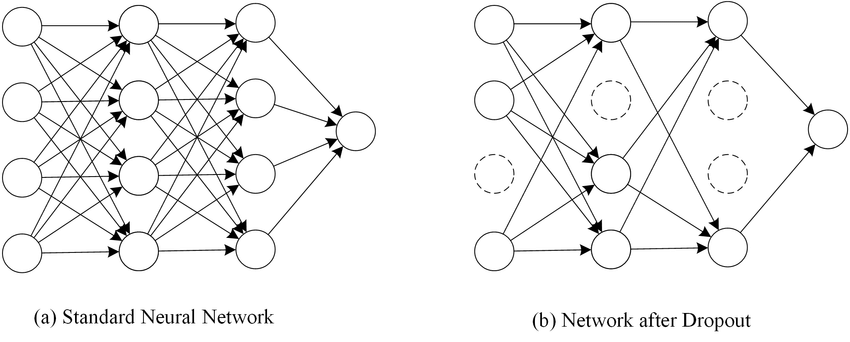

※이미지 출처: https://www.researchgate.net/figure/Dropout-neural-network-model-a-is-a-standard-neural-network-b-is-the-same-network_fig3_309206911

**[Ex.7]**

[Ex.4] mnist 손글씨 데이터셋으로 만든 모델에 첫번째 컨볼루션층 다음에 드롭아웃층(Dropout)을 드롭율을 0.3으로 설정하여 추가하고,

두번째 컨볼루션층 다음에 드롭아웃층을 드롭율을 0.3으로 설정하여 추가합니다.

이전과 이후의 학습 추이를 시각화하고 평가셋의 성능을 비교합니다.

In [134]:
tf.keras.backend.clear_session()

mnist_model_do = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),  # 1차원으로 펼칩니다.
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
mnist_model_do.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics = ['accuracy']
)

train_mnist_hist_do = mnist_model_do.fit(ds_mnist_train.batch(64), validation_data=ds_mnist_val.batch(64), epochs=10)

Epoch 1/10
750/750 [==============================] - 32s 41ms/step - loss: 0.3044 - accuracy: 0.9134 - val_loss: 0.1706 - val_accuracy: 0.9633
Epoch 2/10
750/750 [==============================] - 28s 37ms/step - loss: 0.0972 - accuracy: 0.9703 - val_loss: 0.1121 - val_accuracy: 0.9759
Epoch 3/10
750/750 [==============================] - 28s 37ms/step - loss: 0.0694 - accuracy: 0.9790 - val_loss: 0.0786 - val_accuracy: 0.9814
Epoch 4/10
750/750 [==============================] - 32s 42ms/step - loss: 0.0535 - accuracy: 0.9844 - val_loss: 0.0676 - val_accuracy: 0.9847
Epoch 5/10
750/750 [==============================] - 28s 37ms/step - loss: 0.0465 - accuracy: 0.9850 - val_loss: 0.0638 - val_accuracy: 0.9850
Epoch 6/10
750/750 [==============================] - 28s 37ms/step - loss: 0.0380 - accuracy: 0.9886 - val_loss: 0.0561 - val_accuracy: 0.9868
Epoch 7/10
750/750 [==============================] - 29s 39ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0492 - val_accuracy:

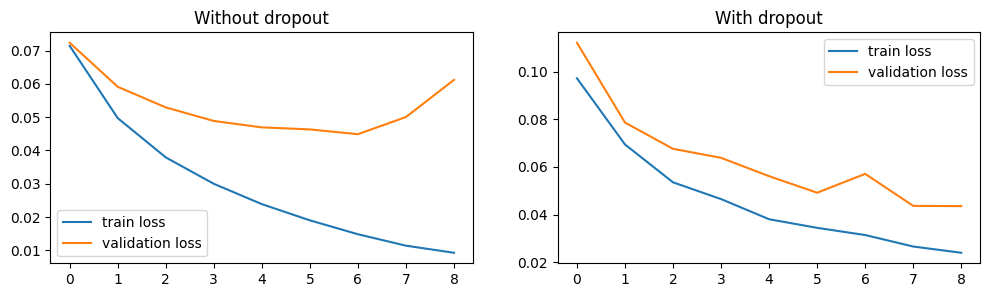

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(train_mnist_hist.history['loss'][1:], label='train loss')
axes[0].plot(train_mnist_hist.history['val_loss'][1:], label='validation loss')
axes[0].set_title('Without dropout')
axes[0].legend()

axes[1].plot(train_mnist_hist_do.history['loss'][1:], label='train loss')
axes[1].plot(train_mnist_hist_do.history['val_loss'][1:], label='validation loss')
axes[1].set_title('With dropout')
axes[1].legend()
plt.show()

In [136]:
y_prd = mnist_model_do.predict(ds_mnist_test.batch(64))
mnist_test_acc_do = accuracy_score(y_test, np.argmax(y_prd, axis=1))
mnist_test_acc, mnist_test_acc_do

157/157 [==============================] - 1s 8ms/step


(0.9846, 0.9899)

### 배치 정규화 (Batch-Normalization)

신경망 층의 입력 분포를 배치(batch)의 평균과 표준 편차를 사용하여 정규화하는 기법입니다.


이는 학습을 안정화시키고 수렴 속도를 향상시킵니다. 특히 깊거나 넓은 신경망에서 효과가 두드러집니다.

- 학습에서는 배치(Batch)의 평균과 표준편차로 정규화하고, 테스트와 예측에서는 전체 데이터셋의 평균과 표준편차나, 각 변수의 이동 평균으로 정규화합니다.


- 그래디언트 소실과 폭주를 방지합니다.


- 가중치 초가화에 덜 민감해집니다.


- 학습률을 크게 설정하여 학습 속도를 높일 수 있습니다.

**[Ex.8]**

[Ex.6]에서 첫번째 LSTM층, 두번째 LSTM층, 첫번째 밀도층 다음에 배치 정규화 층을 추가합니다. 이전과 이후의 학습 추이를 시각화 해봅니다.

In [137]:
tf.keras.backend.clear_session()
dino_name_gen_bn_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(char_to_idx) + 3, 32),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(char_to_idx) + 3),
    tf.keras.layers.Softmax(),
])
dino_name_gen_bn_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
train_gen_bn_hist = dino_name_gen_bn_model.fit(
    ds_dino_name_gen_train.shuffle(1000).batch(64), validation_data=ds_dino_name_gen_val.batch(128),
    epochs=500,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, min_delta=0, min_lr=1e-6)
    ], verbose=0
)

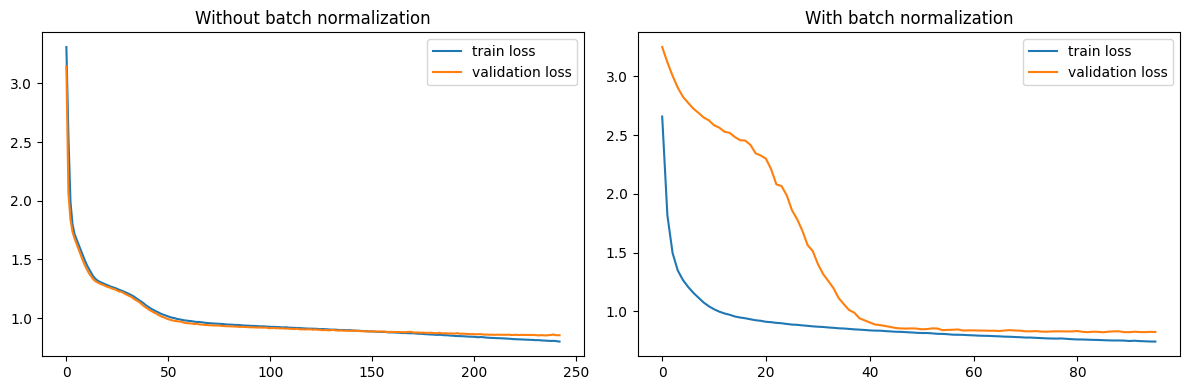

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(train_gen_hist.history['loss'], label='train loss')
axes[0].plot(train_gen_hist.history['val_loss'], label='validation loss')
axes[0].set_title('Without batch normalization')
axes[0].legend()

axes[1].plot(train_gen_bn_hist.history['loss'], label='train loss')
axes[1].plot(train_gen_bn_hist.history['val_loss'], label='validation loss')
axes[1].set_title('With batch normalization')
axes[1].legend()
plt.tight_layout()
plt.show()

### 풀링(Pooling)

입력 데이터의 크기를 줄이거나 특정 특징을 강조하는 목적으로 사용됩니다.

Pooling은 입력 데이터를 작은 영역으로 나누고, 각 영역의 최대값이나 평균 같은 대표값을 만드는 연산을 수행합니다.

- Max Pooling: 각 영역의 최대값으로 영역의 대표값을 만드는 Pooling 방법으로, 해당 특징을 강조할 수 있습니다.


- Average Pooling: 각 영역의 평균으로 대표값을 사용하는 Pooling 방법으로, 입력의 노이즈를 줄이는 데 유용합니다.



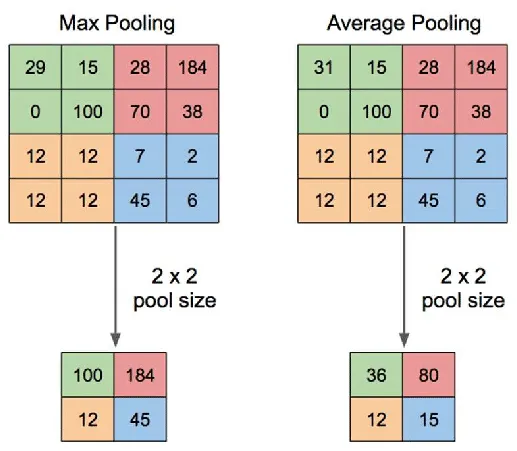

#### 주요 목적

- 입력 데이터의 크기를 줄입니다.

- 공간적 불변성을 제공하여, 노이즈에 덜 민감하게 합니다.

- 특징 부분을 강조하고, 불필요한 정보를 제거하여 모델의 성능을 향상 시킵니다.

## 학습 알고리즘: 경사하강법 심화


#### 목적 함수

경사 하강법은 목적 함수 J(θ)를 최소화하는 파라미터 θ를 찾는 데 사용됩니다.

목적 함수는 모델의 성능을 나타내는 지표로,

일반적으로 평균 제곱 오차 (MSE) 또는 로그 손실 함수 (Log Loss)와 같은 함수를 사용합니다.


> $J(\theta) = \frac{1}{n}\sum_i^n J_i(\theta)$

#### 경사 하강법

경사 하강법은 다은과 같은 방식으로 반복적으로 파라미터를 업데이트하여 목적 함수를 최소화합니다.

> $\theta(t + 1) = \theta(t) - \alpha $


※ 내용 참조: https://tiddler.github.io/optimizers/

경사하강법이 동작하는 것을 예시하기 위해, 두 개의 실수 공간의 변수 x, y를 정의하고

아래 목적 함수를 최소화하는 x, y를 경사하강법을 통해 구해봅니다.

목적함수: $Z = X^2 + 10 Y^2$

이 문제를 시각화하기 위해 등고 그래프를 통해, x, y 에 따른 Z 값을 등고 그래프로 시각화해봅니다.

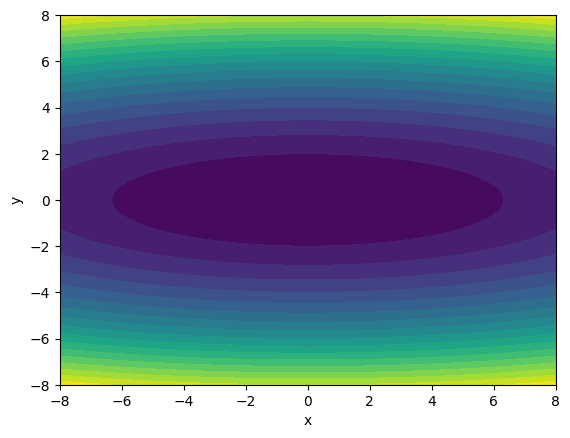

In [144]:
xi = np.linspace(-8, 8, 1000)
yi = np.linspace(-8, 8, 1000)
X,Y = np.meshgrid(xi, yi)
Z = X * X + 10 * Y * Y
def plt_contour(ax, X, Y, Z, arr = None):
    ax.set_xlim(-8, 8)
    ax.set_xlabel('x')
    ax.set_ylim(-8, 8)
    ax.set_ylabel('y')
    xx = X.flatten()
    yy = Y.flatten()
    zz = Z.flatten()
    ax.contourf(X, Y, Z, 20, cmap=plt.get_cmap('viridis'))
    if arr is not None:
        ax.plot(path[:, 0], path[:, 1], color='white')

g_coeff = np.array([2, 20])
def gr(x):
    return g_coeff * x

plt_contour(plt.gca(), X, Y, Z)
plt.show()

#### 확률적 경사하강법

확률적 경사 하강법 (SGD)은 기본 경사 하강법의 확률적 변형입니다.

SGD는 전체 데이터 세트 대신 무작위로 선택된 데이터 샘플 (미니 배치)을 사용하여 파라미터를 업데이트합니다.

$\theta_t \gets \theta_{t-1} - \eta \triangledown J_i(\theta; X_{i:i+n}, Y_{i:i+n})$

확률적 근사: 전체 데이터 세트의 경사도를 배치(Batch)단위의 경사도로 근사화합니다.

**특징**

- 빠른 학습 속도: 전체 데이터 셋을 사용하는 기본 경사 하강법보다 학습 속도가 빠릅니다.


- 메모리 효율성: 전체 데이터 셋을 메모리에 올릴 필요 없이 작동하므로, 메모리 효율적입니다.


- 불안정성: SGD는 무작위 표본을 통한 실제 경사도의 확률적 근사치를 사용하므로 불안정적인 최적화 과정을 거칩니다.

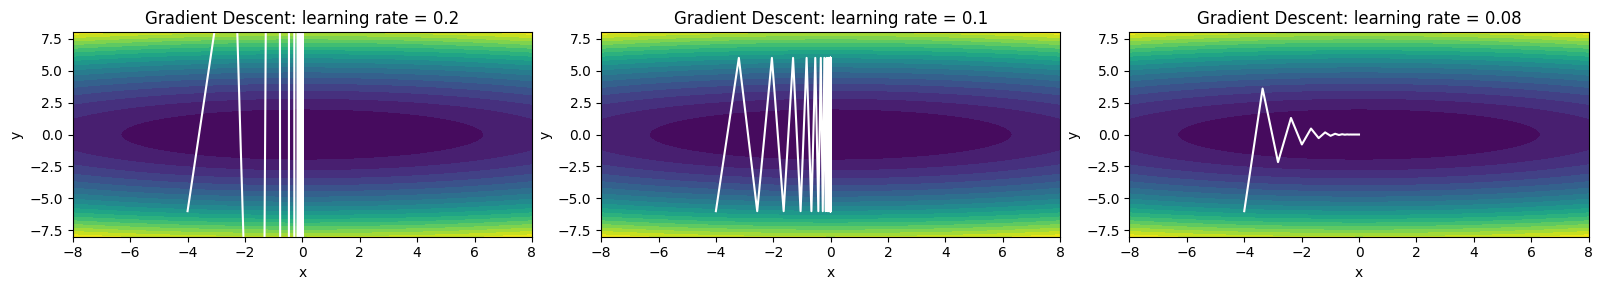

In [145]:
def gd(x_start, step, gradient, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    for _ in range(iteration):
        grad = gradient(x)
        x -= grad * step
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, np.vstack(passing_dot)

fig, axes = plt.subplots(1, 3, figsize=(16, 3))

for learning_rate, ax in zip([0.2, 0.1, 0.08], axes):
    x, path = gd(np.array([-4, -6]), learning_rate , gr)
    plt_contour(ax, X,Y,Z, path)
    ax.set_title('Gradient Descent: learning rate = {}'.format(learning_rate))

plt.tight_layout()
plt.show()

#### 모멘텀(Momentum)


**알고리즘**


1. $v_t \gets \gamma v_{t-1} + \eta \nabla_{\theta_t} J( \theta)$


2. $\theta_{t + 1} \gets \theta_{t} - v_t$


**특징**

- 병목 구간을 벗어나 더 빠른 수렴에 도달할 수 있도록 합니다.


- 경사 하강 곡면이 길 수록 진동의 가능성이 높습니다.


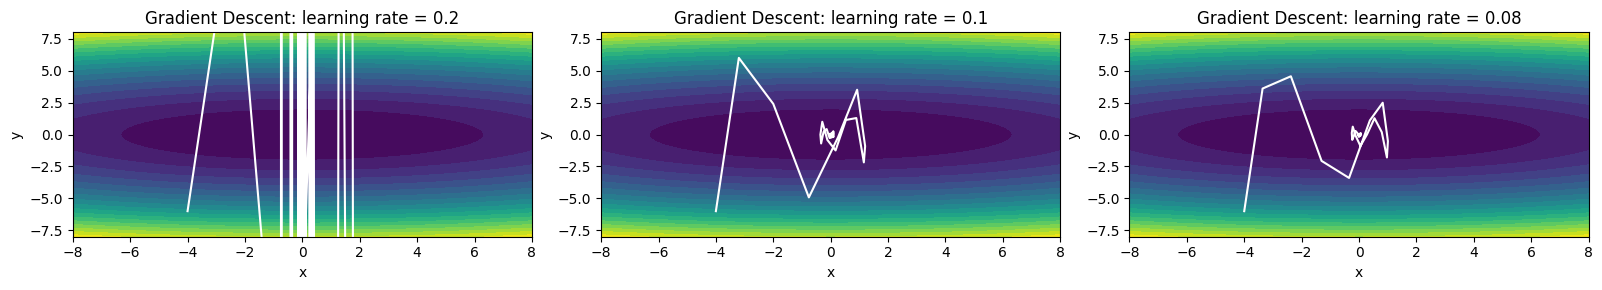

In [146]:
def momentum(x_start, step, g, discount=0.7, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for _ in range(iteration):
        grad = g(x)
        pre_grad = pre_grad * discount + grad
        x -= pre_grad * step
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, np.vstack(passing_dot)

fig, axes = plt.subplots(1, 3, figsize=(16, 3))

for learning_rate, ax in zip([0.2, 0.1, 0.08], axes):
    x, path = momentum(np.array([-4, -6]),learning_rate , gr)
    plt_contour(ax, X,Y,Z, path)
    ax.set_title('Gradient Descent: learning rate = {}'.format(learning_rate))

plt.tight_layout()
plt.show()

#### Adagrad(Adaptive Gradient Algorithm)

파라미터의 과거 업데이트를 크기를 고려하여 학습률을 조절합니다.

이는 경사도가 작은 파라미터는 업데이트 속도를 높이고, 큰 파라미터의 업데이트는 속도를 낮추는 효과를 줍니다.

**알고리즘**

1. $g_{t} \gets \nabla_\theta J( \theta_{t-1} )$


2. $G_{t} \gets G_{t-1} + g_t \odot g_t$,


3. $\theta_{t} \gets \theta_{t-1} - \dfrac{\eta}{\sqrt{G_{t} + \epsilon}} \odot g_{t}$


**특징**

- 경사도가 작은 것에 효과적으로 동작합니다.


- 학습률이 조절 작용은 안정적인 학습을 돕습니다.


- 학습이 진행됨에 따라 학습률이 지나치게 낮게 조정되어 학습의 진행이 갈 수록 어렵게 됩니다.


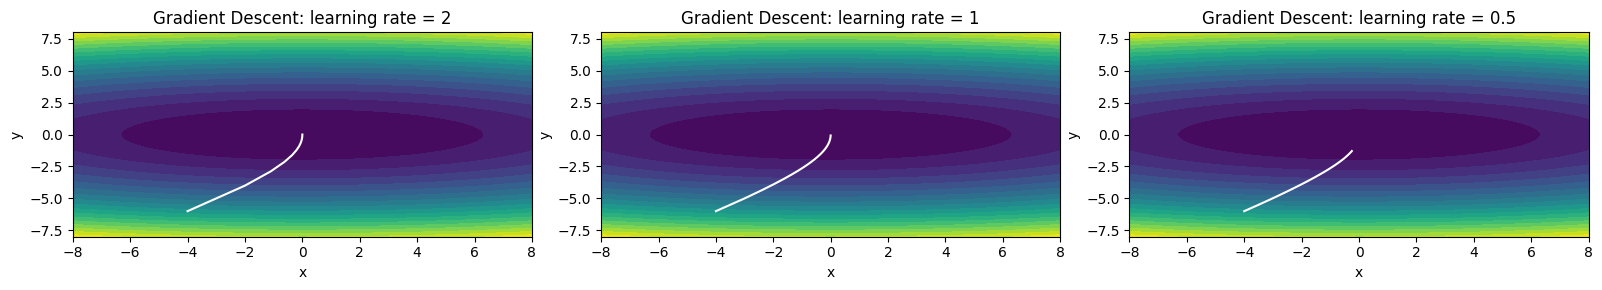

In [147]:
def adagrad(x_start, step, g, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    sum_grad = np.zeros_like(x)
    for _ in range(iteration):
        grad = g(x)
        sum_grad += grad * grad
        x -= step * grad / (np.sqrt(sum_grad) + delta)
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, np.vstack(passing_dot)

fig, axes = plt.subplots(1, 3, figsize=(16, 3))

for learning_rate, ax in zip([2, 1, 0.5], axes):
    x, path = adagrad(np.array([-4, -6]), learning_rate, gr)
    plt_contour(ax, X,Y,Z, path)
    ax.set_title('Gradient Descent: learning rate = {}'.format(learning_rate))

plt.tight_layout()
plt.show()

#### RMSprop(Root Mean Square Propagation)

Adagrad의 학습률 감소 문제를 보완하기 위해 제안된 알고리즘입니다.

과거 기울기의 제곱 평균을 사용하여 학습률을 조절하며, Adagrad보다 안정적인 학습을 가능하게 합니다.

**알고리즘**


1. $g_{t} \gets \nabla_\theta J( \theta_{t-1} )$


2. $G_{t} \gets \gamma G_{t} + (1-\gamma)g_t \odot g_t$


3. $\theta_{t} \gets \theta_{t-1} - \dfrac{\eta}{\sqrt{G_{t} + \epsilon}} \odot g_{t}$


**특징**


- 지수 이동 평균을 사용하여 불안정한 특성을 완화합니다.


- 학습율이 작아지는 현상을 완전히 해결하지는 못했습니다.



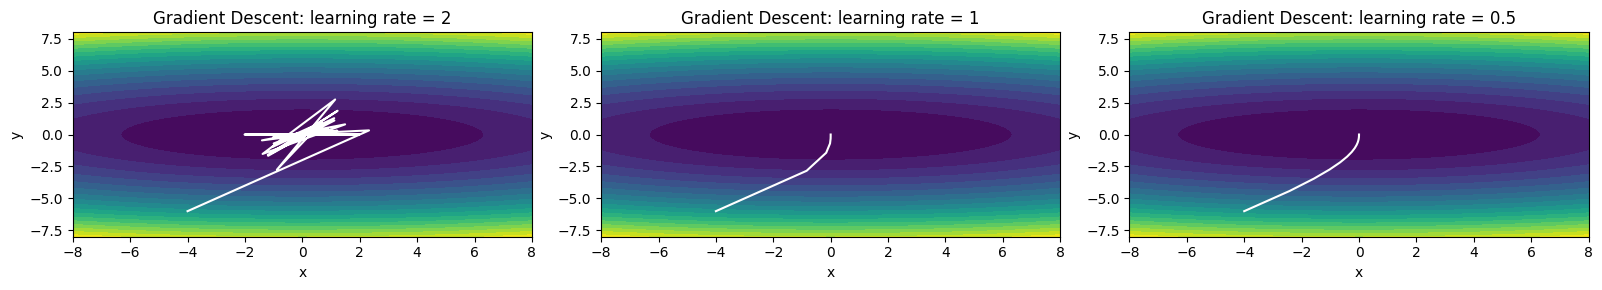

In [148]:
def rmsprop(x_start, step, gradient, rms_decay=0.9, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    sum_grad = np.zeros_like(x)
    passing_dot = [x.copy()]
    for _ in range(iteration):
        grad = gradient(x)
        sum_grad = rms_decay * sum_grad + (1 - rms_decay) * grad * grad
        x -= step * grad / (np.sqrt(sum_grad) + delta)
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, np.vstack(passing_dot)

fig, axes = plt.subplots(1, 3, figsize=(16, 3))

for learning_rate, ax in zip([2, 1, 0.5], axes):
    x, path = rmsprop(np.array([-4, -6]), learning_rate, gr)
    plt_contour(ax, X,Y,Z, path)
    ax.set_title('Gradient Descent: learning rate = {}'.format(learning_rate))

plt.tight_layout()
plt.show()

#### Adam(Adaptive Moment Estimation)

모멘텀(Momentum) 과 RMSProp의 장점을 결합하여 안정적이고 빠른 수렴을 돕는 알고리즘입니다.

이는 과거 기울기 정보를 사용하여 학습률을 조절하며, 두 알고리즘의 장점을 활용하여 효과적인 학습을 가능하게 합니다.

**알고리즘**

1. $g_{t} \gets \nabla_\theta J( \theta_{t-1} )$


2. $m_t \gets \beta_1 m_{t-1} + (1-\beta_1)g_t$


3. $v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$


4. $\hat{m}_t = \dfrac{m_t}{1 - \beta^t_1}$


5. $\theta_{t} = \theta_{t-1} - \dfrac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$


**특징**

- 모멘텀(Momentum) 과 RMSProp의 장점이 발휘된데면 효과적인 학습이 가능합니다.


- 하지만, 문제에 따라 투입 자원 대비 좋지 않은 결과를 얻을 수 있습니다.


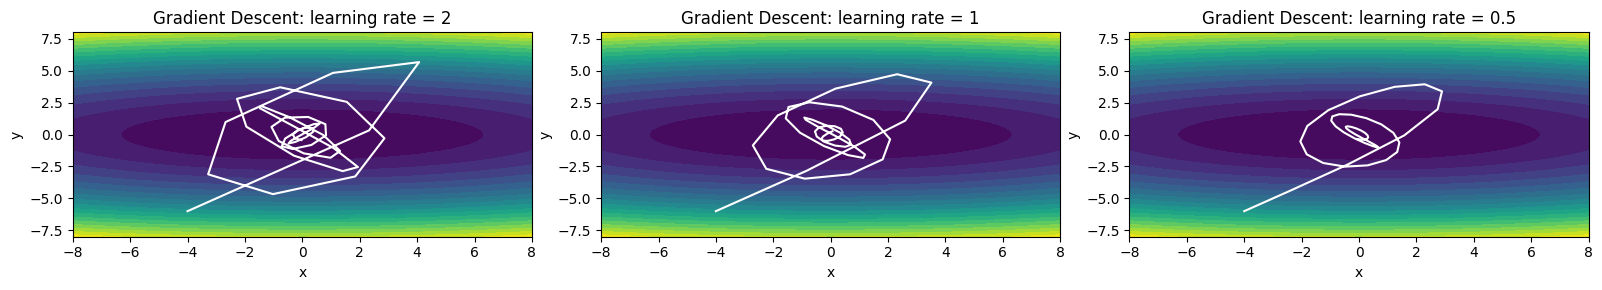

In [149]:
def adam(x_start, step, gradient, beta1=0.9, beta2=0.999, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    sum_m = np.zeros_like(x)
    sum_v = np.zeros_like(x)
    passing_dot = [x.copy()]
    for _ in range(iteration):
        grad = gradient(x)
        sum_m = beta1 * sum_m + (1 - beta1) * grad
        sum_v = beta2 * sum_v + (1 - beta2) * grad * grad
        x -= step * sum_m / (np.sqrt(sum_v + delta))
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, np.vstack(passing_dot)

fig, axes = plt.subplots(1, 3, figsize=(16, 3))

for learning_rate, ax in zip([2, 1, 0.5], axes):
    x, path = adam(np.array([-4, -6]), learning_rate , gr)
    plt_contour(ax, X,Y,Z, path)
    ax.set_title('Gradient Descent: learning rate = {}'.format(learning_rate))

plt.tight_layout()
plt.show()